# Fisioterapia

In [1]:
import warnings
warnings.filterwarnings('ignore')

import os
import joblib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.stats.stattools import jarque_bera

# 1. EDA

A. Yurtman and B. Barshan, `“Automated evaluation of physical therapy exercises using multi-template dynamic time warping on wearable sensor signals”` Computer Methods and Programs in Biomedicine, 117(2):189–207, November 2014 (DOI: 10.1016/j.cmpb.2014.07.003)



`PHYSICAL THERAPY DATASET`

este experimento plantea la importancia de de la terapia física y los retos en su evaluación, como la falta de retroalimentación precisa y constante. Propone sensores portátiles como una solución superior a las cámaras, ya que son menos intrusivos, más adaptables y respetan la privacidad del paciente.

y nuestros datos estan clasificados con la siguiente estructura:


`s1, s2, s3, s4, s5` representan cada sujeto de prueba

estos son nuestros sujetos de prueba

![img](assests/tablaSubjects.png "tablaSubjects")

`e1, e2, e3, e4, e5, e6, e7, e8` representan el tipo de ejercicio que se hizo 

acá podemos visualizar los distintos tipos de ejercicios para la toma de datos

![img](assests/ejercicios.png "ejercicios")

`u1, u2, u3, u4, u5` representan los sensores aderidos al sujeto de prueba

podemos ver las unidades de sensores como van aderidos `(a)`prueba de piernas `(b)`prueba de brazo

![img](assests/sensores.png "sensores")

y hay tres distintos tipos de archivos los cuales son:

`template_session.txt` Contiene datos de una sesión de plantilla con tres ejecuciones para cada tipo de ejercicio, seleccionando una plantilla entre cuatro posibles.

`template_times.txt` Proporciona los intervalos de tiempo de inicio y fin de las plantillas seleccionadas.

`test.txt` Registra sesiones de prueba con 10 repeticiones para cada tipo de ejercicio.



# 2. Carga de datos

In [2]:
currDir = os.getcwd()
carpeta = 'fisioDataset'

subjets = ['s1', 's2', 's3', 's4', 's5']
exercises = ['e1', 'e2', 'e3', 'e4', 'e5', 'e6', 'e7', 'e8']
units = ['u1', 'u2', 'u3', 'u4', 'u5']

nameTrain = 'template_session.txt'
nameTest = 'test.txt'

In [3]:
sujetoTrain = []
#sujetoTest = []
for subjet in subjets:
    ejercicioTrain = []
    #ejercicioTest = []

    for exercise in exercises:
        sensorTrain = []
        #sensorTest = []

        for unit in units:

            rutaTrain = os.path.join(currDir, carpeta, subjet, exercise, unit, nameTrain)
            #rutaTest = os.path.join(carpeta, subjet, exercise, unit, nameTest)

            sensorTrain.append(pd.read_csv(rutaTrain, sep=';').drop(columns="time index"))
            #sensorTest.append(pd.read_csv(rutaTest, sep=';').drop(columns="time index"))

        ejercicioTrain.append(sensorTrain)
        #ejercicioTest.append(sensorTest)
        
    sujetoTrain.append(ejercicioTrain)
    #sujetoTest.append(ejercicioTest)


# 3. Ejercicios

In [4]:
cols = ['acc_x', 'acc_y', 'acc_z', 'gyr_x', 'gyr_y', 'gyr_z', 'mag_x', 'mag_y', 'mag_z']

## 3.3. Ejercicio 3

este ejercicio corresponde a estar acostado boca abajo y levantar para luego bajar la pierna derecha

![img](assests/e3.png "e3")

![img](assests/sensorA.png "sensorA")

### 3.3.4. sujeto de prueba 4 con sensore 1, 2 y 3

visualizaremos el sensor 1 ubicado en el tobillo de la pierna izquierda, sensor 2 ubicado en el tobillo de la pierna derecha y el sensor 3 ubicado a la altura de la rodilla derecha

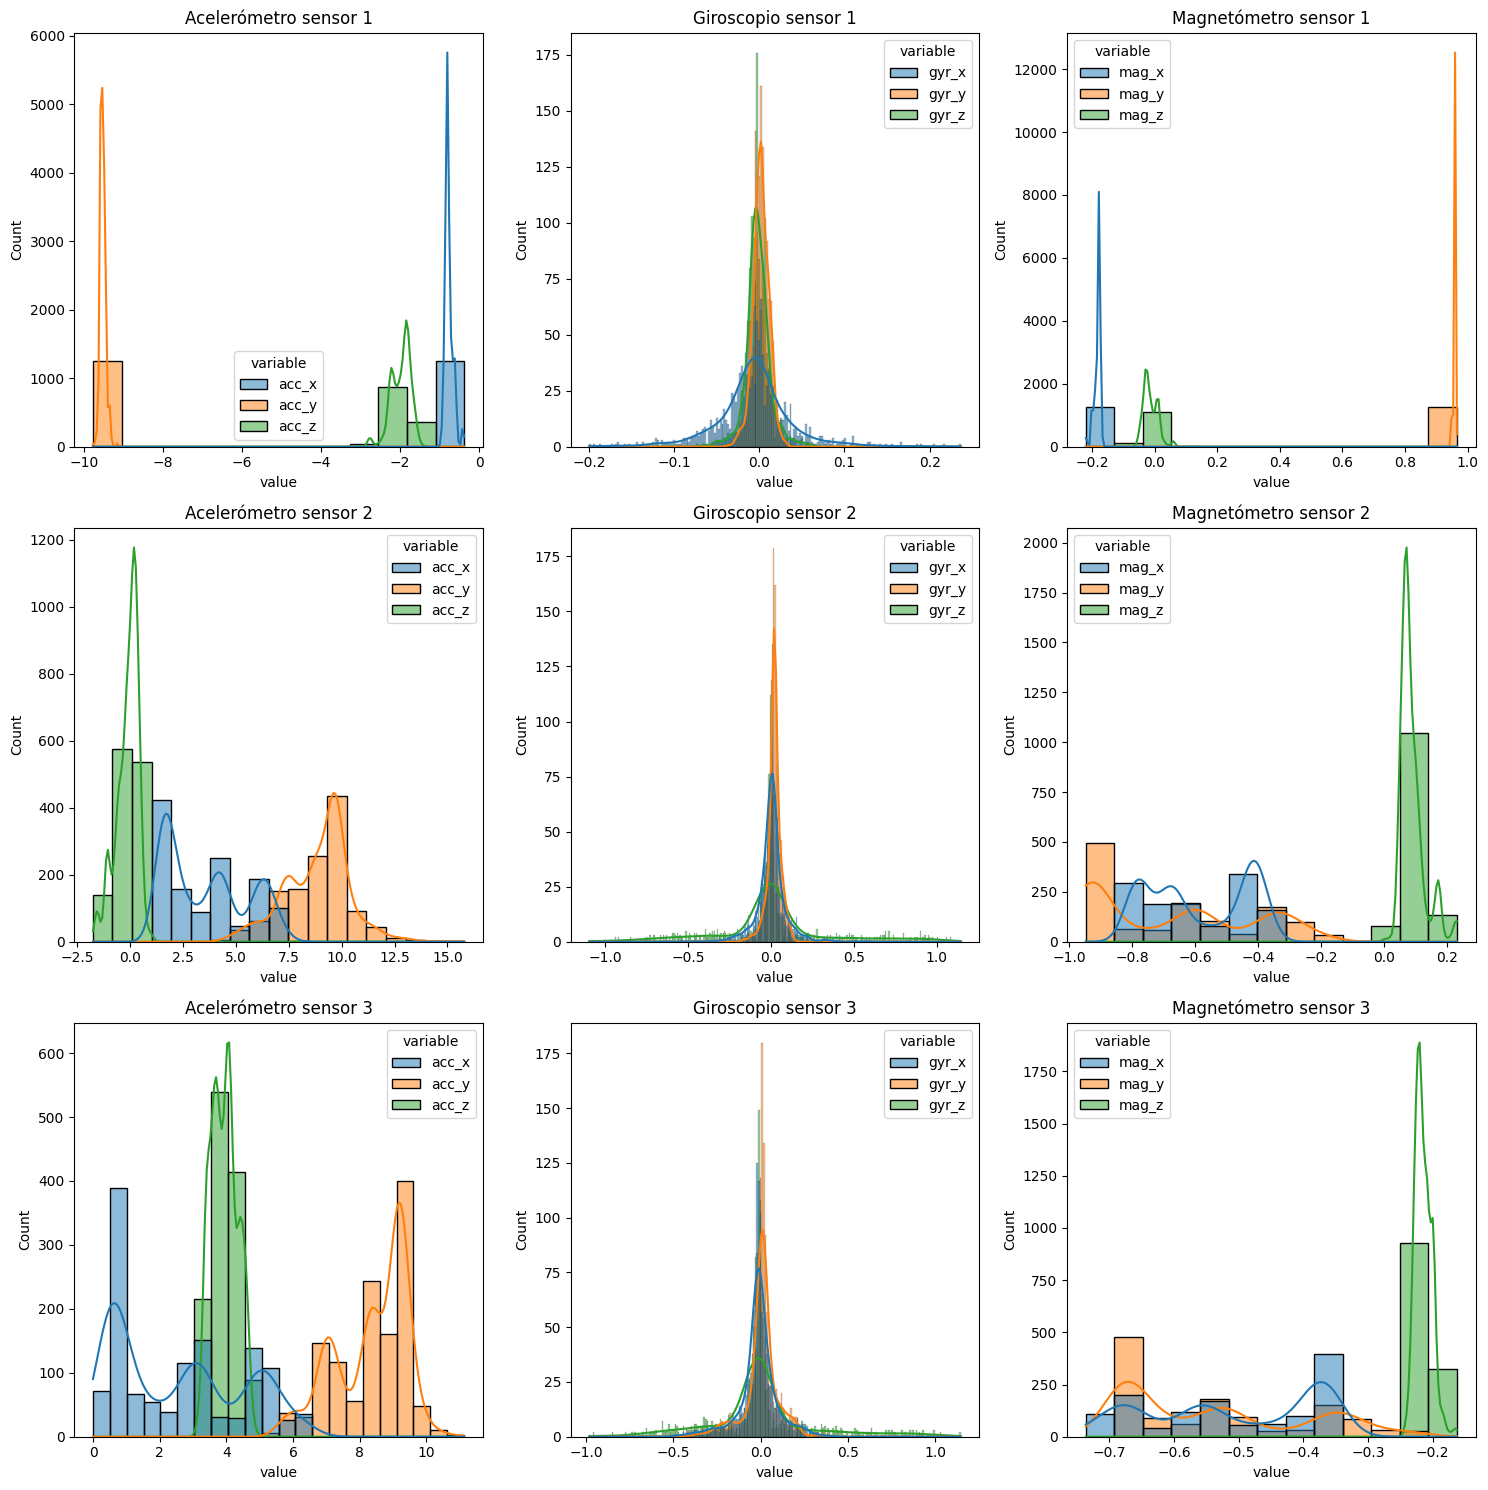

In [5]:
suj = 3
eje = 2

fig, axes = plt.subplots(3, 3, figsize=(15, 15))

sns.histplot(sujetoTrain[suj][eje][0][['acc_x', 'acc_y', 'acc_z']].melt(value_name='value'), x='value', hue='variable', ax=axes[0,0], kde=True)
axes[0,0].set_title('Acelerómetro sensor 1')
sns.histplot(sujetoTrain[suj][eje][0][['gyr_x', 'gyr_y', 'gyr_z']].melt(value_name='value'), x='value', hue='variable', ax=axes[0,1], kde=True)
axes[0,1].set_title('Giroscopio sensor 1')
sns.histplot(sujetoTrain[suj][eje][0][['mag_x', 'mag_y', 'mag_z']].melt(value_name='value'), x='value', hue='variable', ax=axes[0,2], kde=True)
axes[0,2].set_title('Magnetómetro sensor 1')

sns.histplot(sujetoTrain[suj][eje][1][['acc_x', 'acc_y', 'acc_z']].melt(value_name='value'), x='value', hue='variable', ax=axes[1,0], kde=True)
axes[1,0].set_title('Acelerómetro sensor 2')
sns.histplot(sujetoTrain[suj][eje][1][['gyr_x', 'gyr_y', 'gyr_z']].melt(value_name='value'), x='value', hue='variable', ax=axes[1,1], kde=True)
axes[1,1].set_title('Giroscopio sensor 2')
sns.histplot(sujetoTrain[suj][eje][1][['mag_x', 'mag_y', 'mag_z']].melt(value_name='value'), x='value', hue='variable', ax=axes[1,2], kde=True)
axes[1,2].set_title('Magnetómetro sensor 2')

sns.histplot(sujetoTrain[suj][eje][2][['acc_x', 'acc_y', 'acc_z']].melt(value_name='value'), x='value', hue='variable', ax=axes[2,0], kde=True)
axes[2,0].set_title('Acelerómetro sensor 3')
sns.histplot(sujetoTrain[suj][eje][2][['gyr_x', 'gyr_y', 'gyr_z']].melt(value_name='value'), x='value', hue='variable', ax=axes[2,1], kde=True)
axes[2,1].set_title('Giroscopio sensor 3')
sns.histplot(sujetoTrain[suj][eje][2][['mag_x', 'mag_y', 'mag_z']].melt(value_name='value'), x='value', hue='variable', ax=axes[2,2], kde=True)
axes[2,2].set_title('Magnetómetro sensor 3')

plt.tight_layout()
plt.show()

al colocar las 3 componentes `X,Y,Z` en una misma grafica pdemos ver como la componente `Z` sobresale al ser esta la orientación en que la pierna sube y baja y es donde registra los cambios en el sensor

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


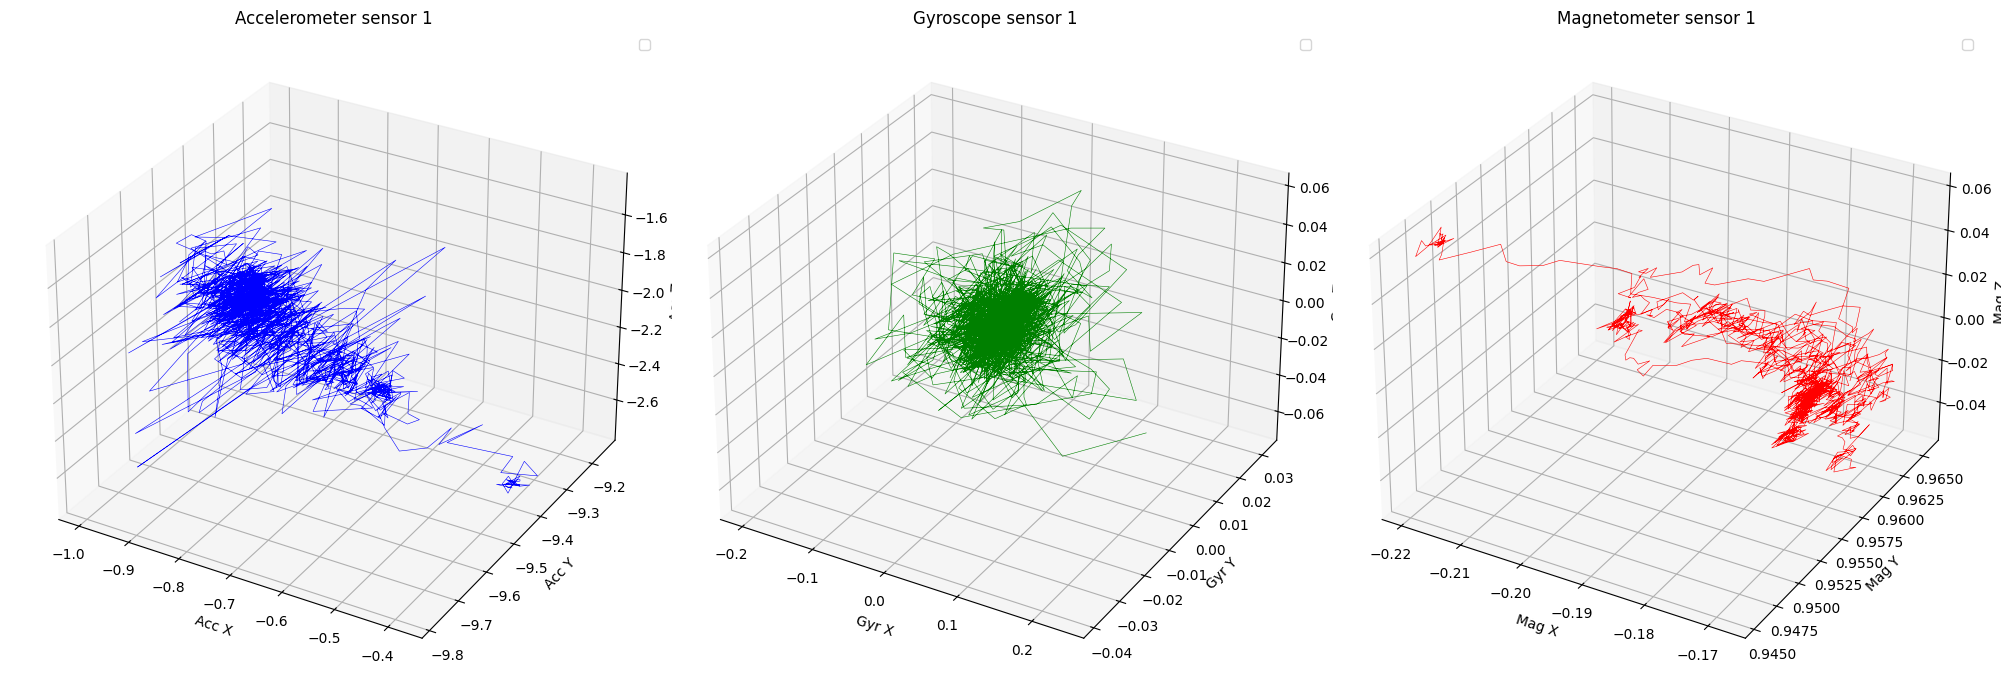

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


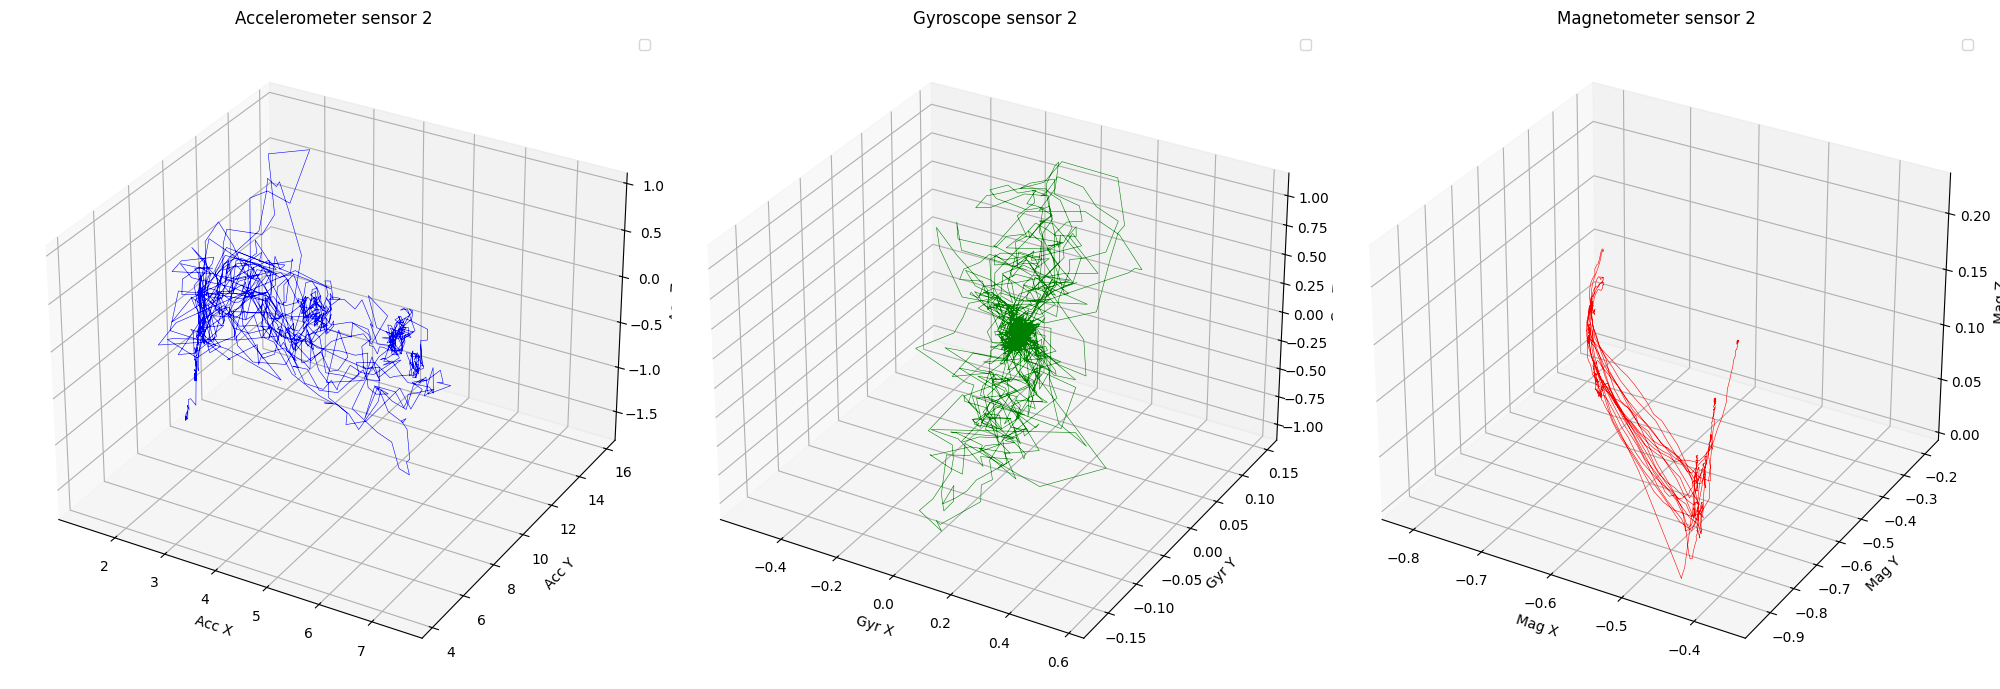

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


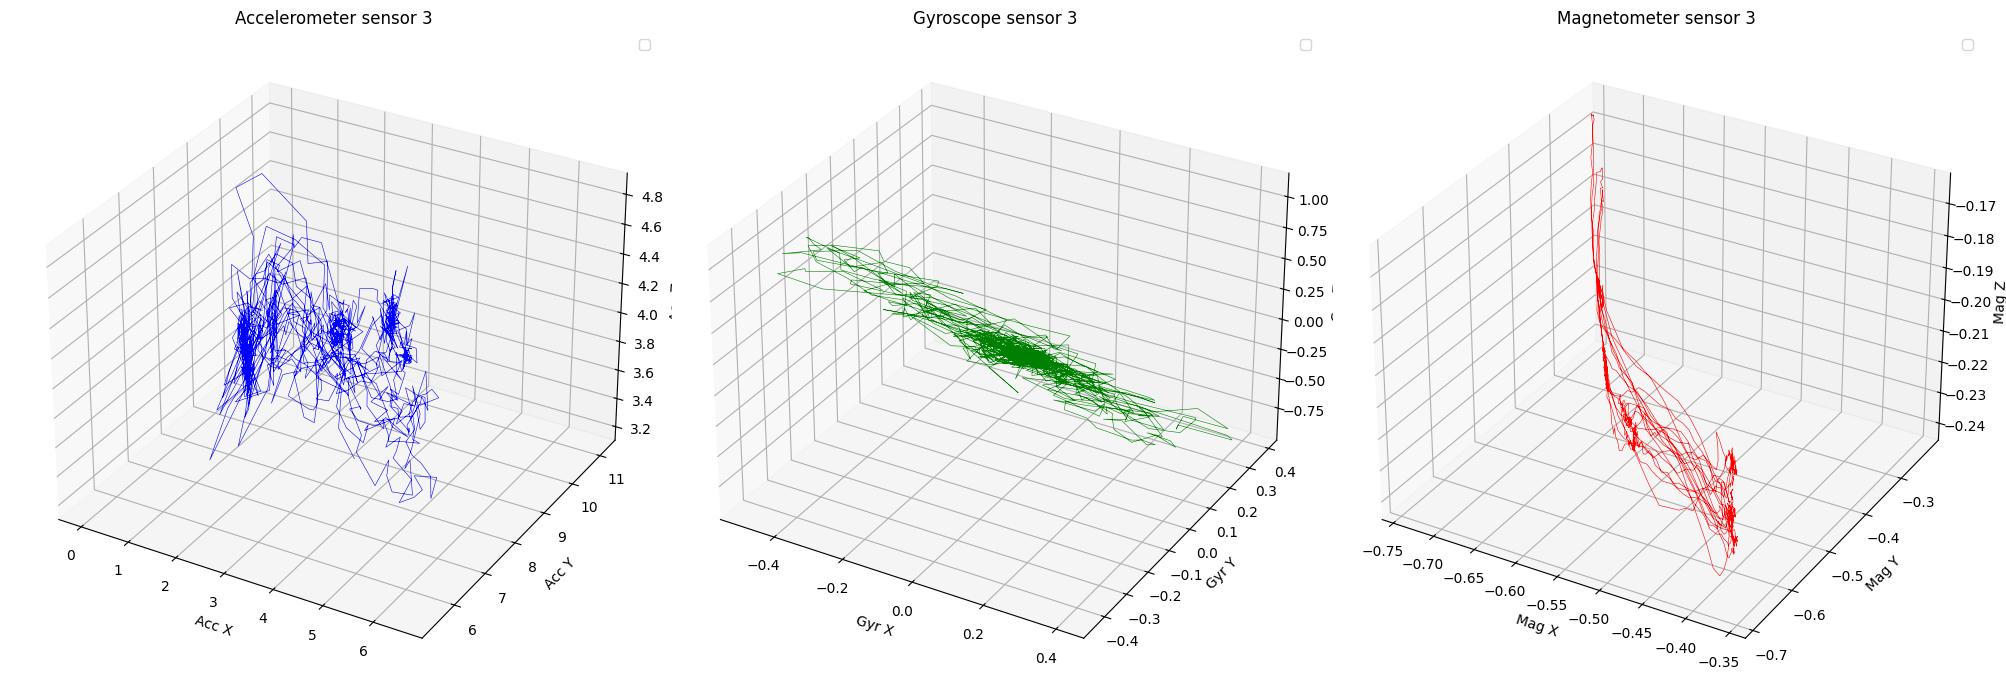

In [6]:
suj = 3
eje = 2

fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(131, projection='3d')
ax1.plot(sujetoTrain[suj][eje][0]['acc_x'], sujetoTrain[suj][eje][0]['acc_y'], sujetoTrain[suj][eje][0]['acc_z'], color='blue', linewidth=0.4)
ax1.set_xlabel('Acc X')
ax1.set_ylabel('Acc Y')
ax1.set_zlabel('Acc Z')
ax1.set_title('Accelerometer sensor 1')
ax1.legend()
ax2 = fig.add_subplot(132, projection='3d')
ax2.plot(sujetoTrain[suj][eje][0]['gyr_x'], sujetoTrain[suj][eje][0]['gyr_y'], sujetoTrain[suj][eje][0]['gyr_z'], color='green', linewidth=0.4)
ax2.set_xlabel('Gyr X')
ax2.set_ylabel('Gyr Y')
ax2.set_zlabel('Gyr Z')
ax2.set_title('Gyroscope sensor 1')
ax2.legend()
ax3 = fig.add_subplot(133, projection='3d')
ax3.plot(sujetoTrain[suj][eje][0]['mag_x'], sujetoTrain[suj][eje][0]['mag_y'], sujetoTrain[suj][eje][0]['mag_z'], color='red', linewidth=0.4)
ax3.set_xlabel('Mag X')
ax3.set_ylabel('Mag Y')
ax3.set_zlabel('Mag Z')
ax3.set_title('Magnetometer sensor 1')
ax3.legend()

plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(131, projection='3d')
ax1.plot(sujetoTrain[suj][eje][1]['acc_x'], sujetoTrain[suj][eje][1]['acc_y'], sujetoTrain[suj][eje][1]['acc_z'], color='blue', linewidth=0.4)
ax1.set_xlabel('Acc X')
ax1.set_ylabel('Acc Y')
ax1.set_zlabel('Acc Z')
ax1.set_title('Accelerometer sensor 2')
ax1.legend()
ax2 = fig.add_subplot(132, projection='3d')
ax2.plot(sujetoTrain[suj][eje][1]['gyr_x'], sujetoTrain[suj][eje][1]['gyr_y'], sujetoTrain[suj][eje][1]['gyr_z'], color='green', linewidth=0.4)
ax2.set_xlabel('Gyr X')
ax2.set_ylabel('Gyr Y')
ax2.set_zlabel('Gyr Z')
ax2.set_title('Gyroscope sensor 2')
ax2.legend()
ax3 = fig.add_subplot(133, projection='3d')
ax3.plot(sujetoTrain[suj][eje][1]['mag_x'], sujetoTrain[suj][eje][1]['mag_y'], sujetoTrain[suj][eje][1]['mag_z'], color='red', linewidth=0.4)
ax3.set_xlabel('Mag X')
ax3.set_ylabel('Mag Y')
ax3.set_zlabel('Mag Z')
ax3.set_title('Magnetometer sensor 2')
ax3.legend()

plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(131, projection='3d')
ax1.plot(sujetoTrain[suj][eje][2]['acc_x'], sujetoTrain[suj][eje][2]['acc_y'], sujetoTrain[suj][eje][2]['acc_z'], color='blue', linewidth=0.4)
ax1.set_xlabel('Acc X')
ax1.set_ylabel('Acc Y')
ax1.set_zlabel('Acc Z')
ax1.set_title('Accelerometer sensor 3')
ax1.legend()
ax2 = fig.add_subplot(132, projection='3d')
ax2.plot(sujetoTrain[suj][eje][2]['gyr_x'], sujetoTrain[suj][eje][2]['gyr_y'], sujetoTrain[suj][eje][2]['gyr_z'], color='green', linewidth=0.4)
ax2.set_xlabel('Gyr X')
ax2.set_ylabel('Gyr Y')
ax2.set_zlabel('Gyr Z')
ax2.set_title('Gyroscope sensor 3')
ax2.legend()
ax3 = fig.add_subplot(133, projection='3d')
ax3.plot(sujetoTrain[suj][eje][2]['mag_x'], sujetoTrain[suj][eje][2]['mag_y'], sujetoTrain[suj][eje][2]['mag_z'], color='red', linewidth=0.4)
ax3.set_xlabel('Mag X')
ax3.set_ylabel('Mag Y')
ax3.set_zlabel('Mag Z')
ax3.set_title('Magnetometer sensor 3')
ax3.legend()

plt.tight_layout()
plt.show()

como tenemos las 3 componentes de dimensión podemos graficar que patrones siguen cada componente en el espacio y observamos que los valores en los que se desplaza hay inidicios de movientos en este caso en la en el tobillo de la pierna derecha durante un tiempo y como se espera el `sensor 1` siendo la pierna izquierda esta no se mueve por lo que en las graficas vemos que si acaso vay variabilidad en sus datos

### 3.3.5. sujeto de prueba 5 con sensor 1, 2 y 3

visualizaremos el sensor 1 ubicado en el tobillo de la pierna izquierda, sensor 2 ubicado en el tobillo de la pierna derecha y el sensor 3 ubicado a la altura de la rodilla derecha

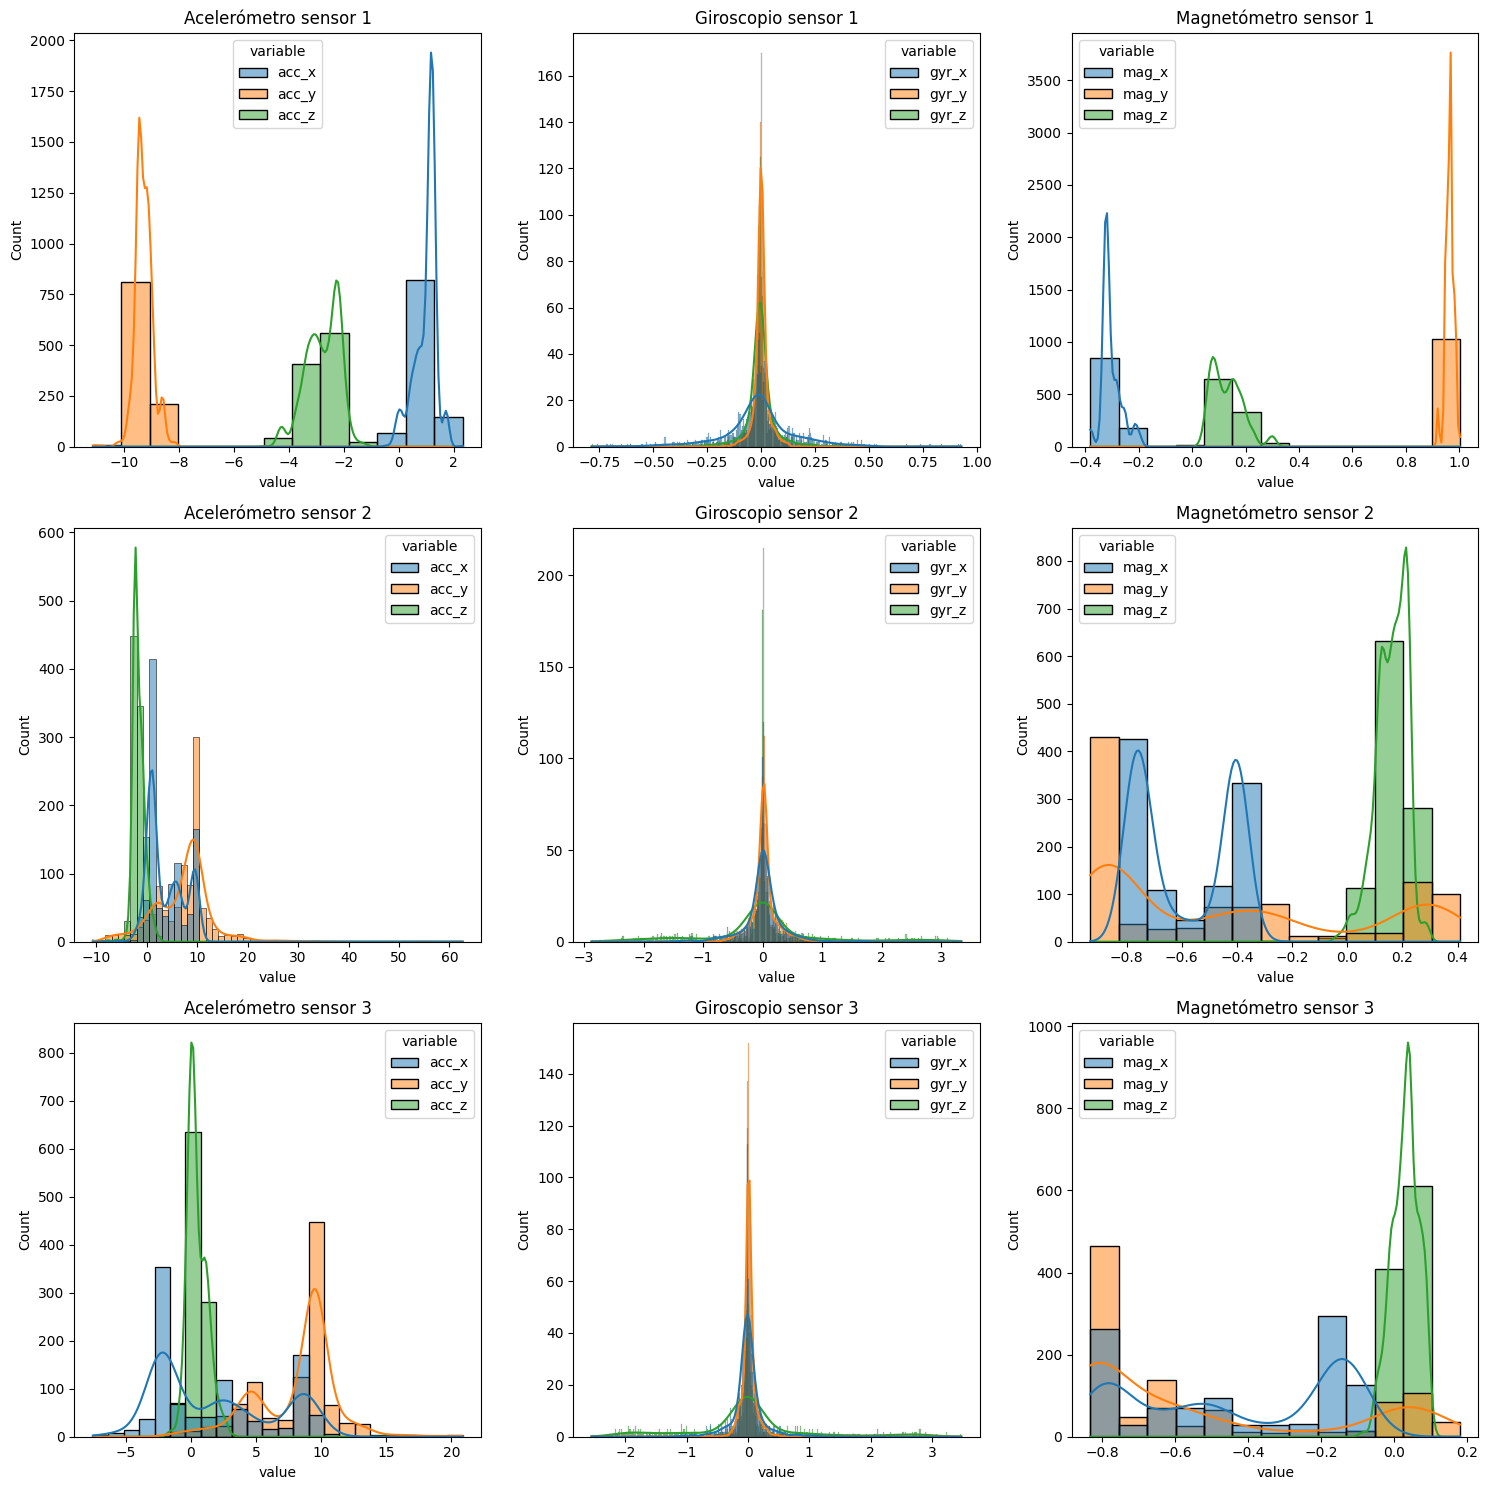

In [7]:
suj = 4
eje = 2

fig, axes = plt.subplots(3, 3, figsize=(15, 15))

sns.histplot(sujetoTrain[suj][eje][0][['acc_x', 'acc_y', 'acc_z']].melt(value_name='value'), x='value', hue='variable', ax=axes[0,0], kde=True)
axes[0,0].set_title('Acelerómetro sensor 1')
sns.histplot(sujetoTrain[suj][eje][0][['gyr_x', 'gyr_y', 'gyr_z']].melt(value_name='value'), x='value', hue='variable', ax=axes[0,1], kde=True)
axes[0,1].set_title('Giroscopio sensor 1')
sns.histplot(sujetoTrain[suj][eje][0][['mag_x', 'mag_y', 'mag_z']].melt(value_name='value'), x='value', hue='variable', ax=axes[0,2], kde=True)
axes[0,2].set_title('Magnetómetro sensor 1')

sns.histplot(sujetoTrain[suj][eje][1][['acc_x', 'acc_y', 'acc_z']].melt(value_name='value'), x='value', hue='variable', ax=axes[1,0], kde=True)
axes[1,0].set_title('Acelerómetro sensor 2')
sns.histplot(sujetoTrain[suj][eje][1][['gyr_x', 'gyr_y', 'gyr_z']].melt(value_name='value'), x='value', hue='variable', ax=axes[1,1], kde=True)
axes[1,1].set_title('Giroscopio sensor 2')
sns.histplot(sujetoTrain[suj][eje][1][['mag_x', 'mag_y', 'mag_z']].melt(value_name='value'), x='value', hue='variable', ax=axes[1,2], kde=True)
axes[1,2].set_title('Magnetómetro sensor 2')

sns.histplot(sujetoTrain[suj][eje][2][['acc_x', 'acc_y', 'acc_z']].melt(value_name='value'), x='value', hue='variable', ax=axes[2,0], kde=True)
axes[2,0].set_title('Acelerómetro sensor 3')
sns.histplot(sujetoTrain[suj][eje][2][['gyr_x', 'gyr_y', 'gyr_z']].melt(value_name='value'), x='value', hue='variable', ax=axes[2,1], kde=True)
axes[2,1].set_title('Giroscopio sensor 3')
sns.histplot(sujetoTrain[suj][eje][2][['mag_x', 'mag_y', 'mag_z']].melt(value_name='value'), x='value', hue='variable', ax=axes[2,2], kde=True)
axes[2,2].set_title('Magnetómetro sensor 3')

plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


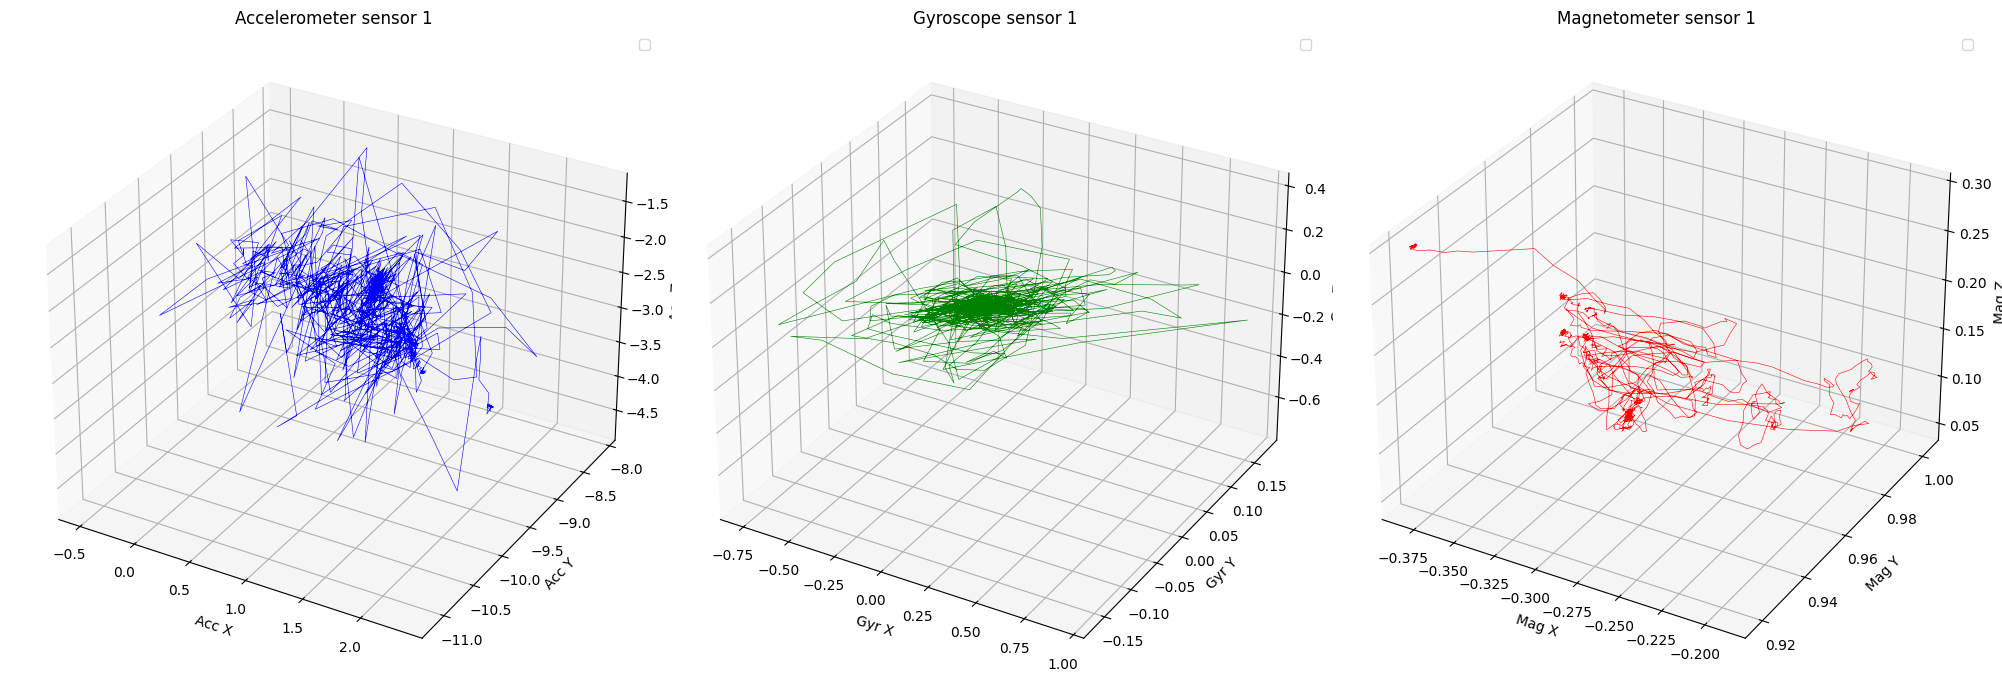

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


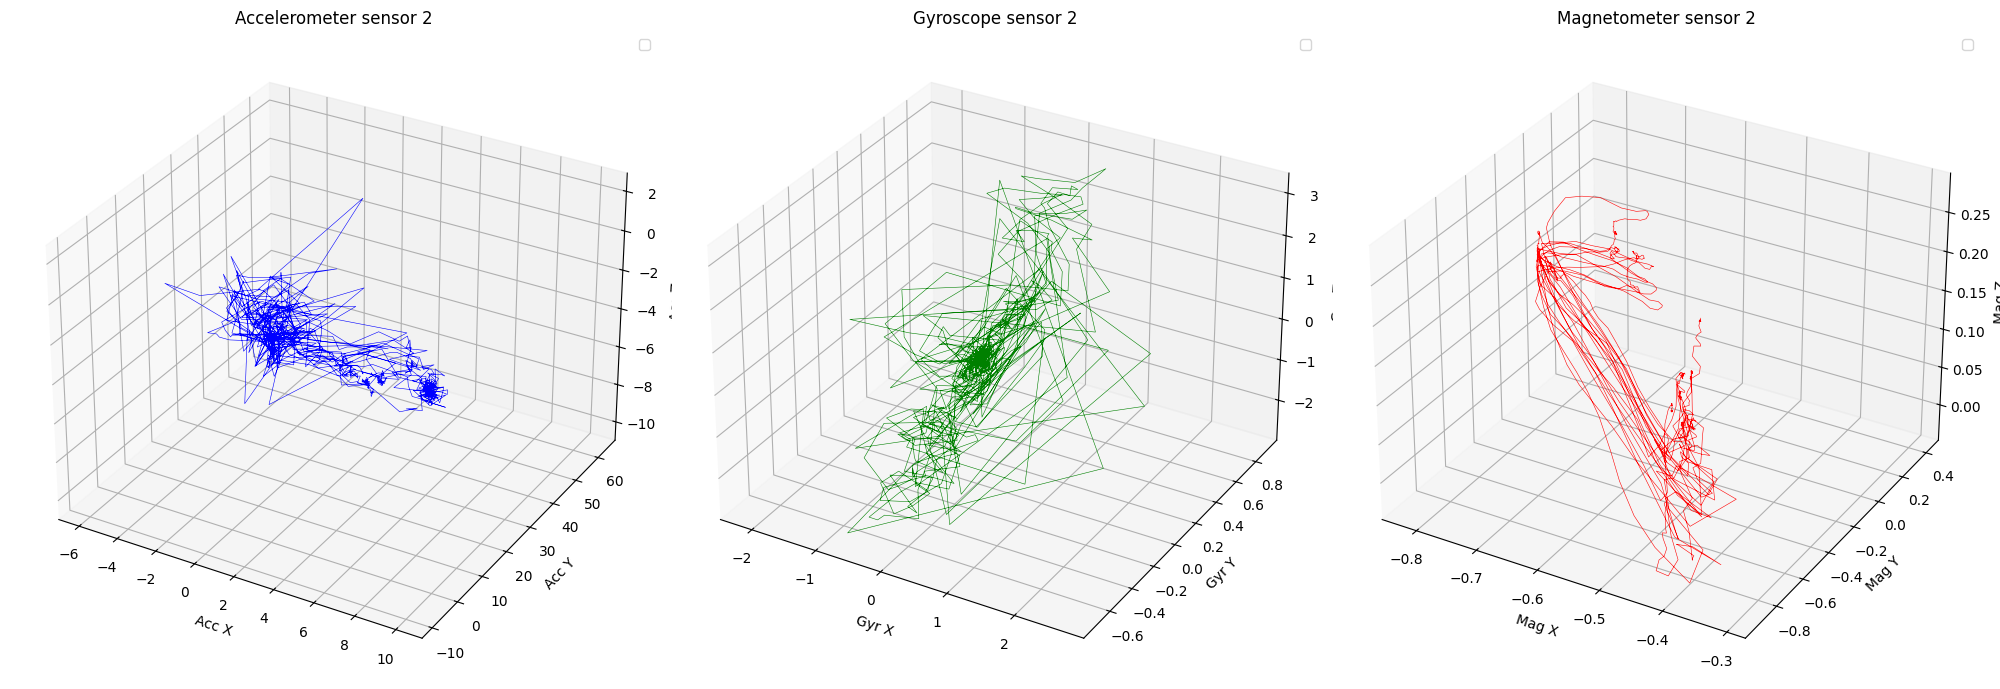

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


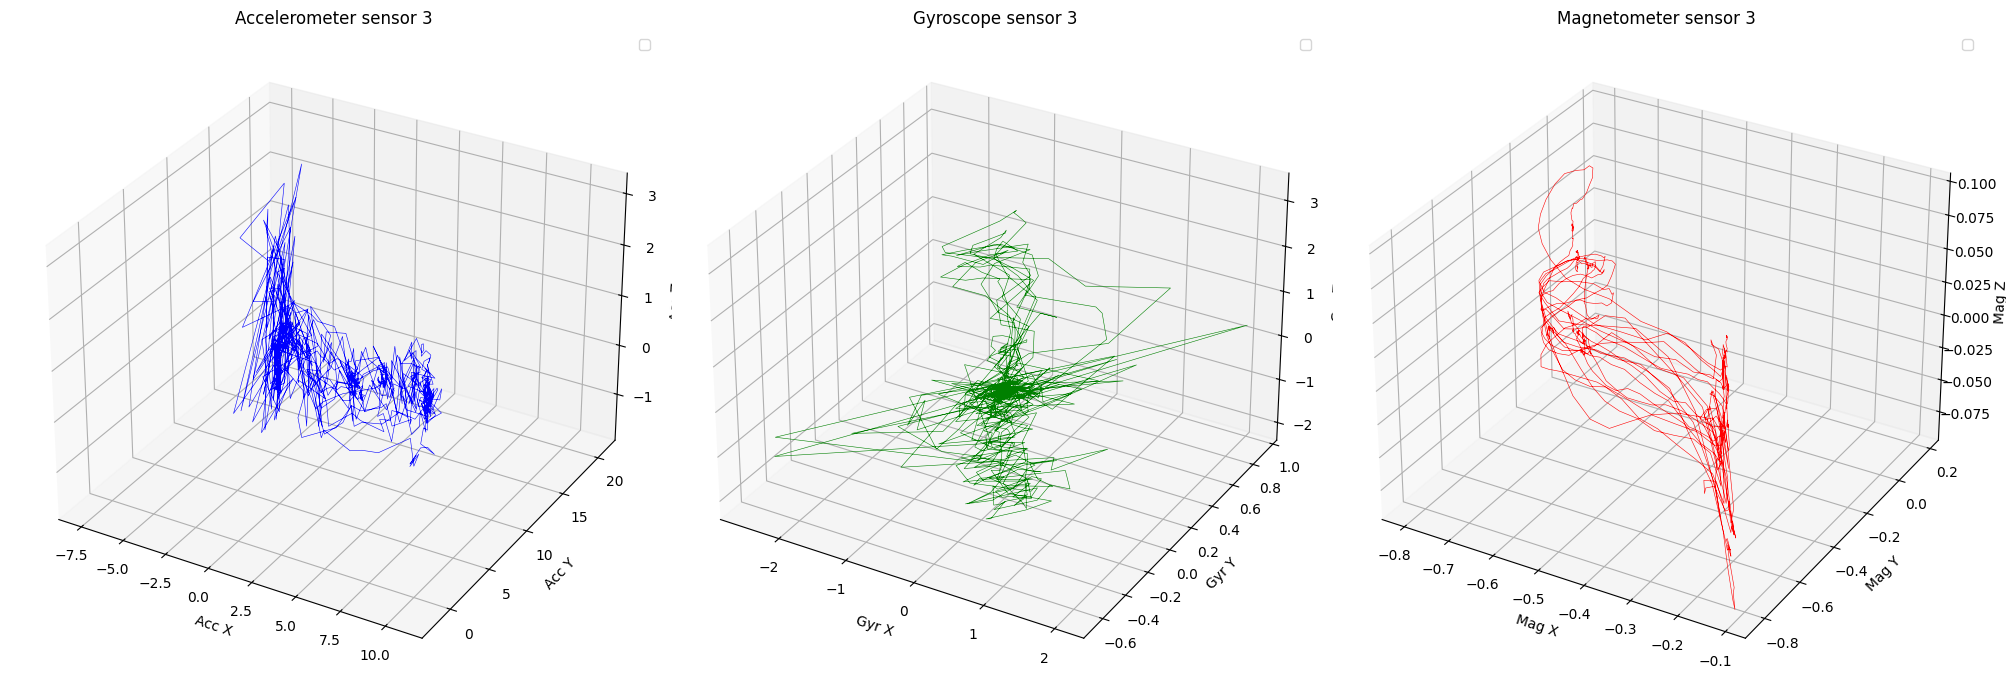

In [8]:
suj = 4
eje = 2

fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(131, projection='3d')
ax1.plot(sujetoTrain[suj][eje][0]['acc_x'], sujetoTrain[suj][eje][0]['acc_y'], sujetoTrain[suj][eje][0]['acc_z'], color='blue', linewidth=0.4)
ax1.set_xlabel('Acc X')
ax1.set_ylabel('Acc Y')
ax1.set_zlabel('Acc Z')
ax1.set_title('Accelerometer sensor 1')
ax1.legend()
ax2 = fig.add_subplot(132, projection='3d')
ax2.plot(sujetoTrain[suj][eje][0]['gyr_x'], sujetoTrain[suj][eje][0]['gyr_y'], sujetoTrain[suj][eje][0]['gyr_z'], color='green', linewidth=0.4)
ax2.set_xlabel('Gyr X')
ax2.set_ylabel('Gyr Y')
ax2.set_zlabel('Gyr Z')
ax2.set_title('Gyroscope sensor 1')
ax2.legend()
ax3 = fig.add_subplot(133, projection='3d')
ax3.plot(sujetoTrain[suj][eje][0]['mag_x'], sujetoTrain[suj][eje][0]['mag_y'], sujetoTrain[suj][eje][0]['mag_z'], color='red', linewidth=0.4)
ax3.set_xlabel('Mag X')
ax3.set_ylabel('Mag Y')
ax3.set_zlabel('Mag Z')
ax3.set_title('Magnetometer sensor 1')
ax3.legend()

plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(131, projection='3d')
ax1.plot(sujetoTrain[suj][eje][1]['acc_x'], sujetoTrain[suj][eje][1]['acc_y'], sujetoTrain[suj][eje][1]['acc_z'], color='blue', linewidth=0.4)
ax1.set_xlabel('Acc X')
ax1.set_ylabel('Acc Y')
ax1.set_zlabel('Acc Z')
ax1.set_title('Accelerometer sensor 2')
ax1.legend()
ax2 = fig.add_subplot(132, projection='3d')
ax2.plot(sujetoTrain[suj][eje][1]['gyr_x'], sujetoTrain[suj][eje][1]['gyr_y'], sujetoTrain[suj][eje][1]['gyr_z'], color='green', linewidth=0.4)
ax2.set_xlabel('Gyr X')
ax2.set_ylabel('Gyr Y')
ax2.set_zlabel('Gyr Z')
ax2.set_title('Gyroscope sensor 2')
ax2.legend()
ax3 = fig.add_subplot(133, projection='3d')
ax3.plot(sujetoTrain[suj][eje][1]['mag_x'], sujetoTrain[suj][eje][1]['mag_y'], sujetoTrain[suj][eje][1]['mag_z'], color='red', linewidth=0.4)
ax3.set_xlabel('Mag X')
ax3.set_ylabel('Mag Y')
ax3.set_zlabel('Mag Z')
ax3.set_title('Magnetometer sensor 2')
ax3.legend()

plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(131, projection='3d')
ax1.plot(sujetoTrain[suj][eje][2]['acc_x'], sujetoTrain[suj][eje][2]['acc_y'], sujetoTrain[suj][eje][2]['acc_z'], color='blue', linewidth=0.4)
ax1.set_xlabel('Acc X')
ax1.set_ylabel('Acc Y')
ax1.set_zlabel('Acc Z')
ax1.set_title('Accelerometer sensor 3')
ax1.legend()
ax2 = fig.add_subplot(132, projection='3d')
ax2.plot(sujetoTrain[suj][eje][2]['gyr_x'], sujetoTrain[suj][eje][2]['gyr_y'], sujetoTrain[suj][eje][2]['gyr_z'], color='green', linewidth=0.4)
ax2.set_xlabel('Gyr X')
ax2.set_ylabel('Gyr Y')
ax2.set_zlabel('Gyr Z')
ax2.set_title('Gyroscope sensor 3')
ax2.legend()
ax3 = fig.add_subplot(133, projection='3d')
ax3.plot(sujetoTrain[suj][eje][2]['mag_x'], sujetoTrain[suj][eje][2]['mag_y'], sujetoTrain[suj][eje][2]['mag_z'], color='red', linewidth=0.4)
ax3.set_xlabel('Mag X')
ax3.set_ylabel('Mag Y')
ax3.set_zlabel('Mag Z')
ax3.set_title('Magnetometer sensor 3')
ax3.legend()

plt.tight_layout()
plt.show()

comparando las graficas vemos las similitudes en 

## 3.7. Ejercicio 7

este ejercicio corresponde a estar de pie y alzar el brazo derecho a un costado y bajarlo

![img](assests/e7.png "e7")

![img](assests/sensorB.png "sensorB")

### 3.7.1. sujeto de prueba 1 con sensor 1, 2 y 3

visualizaremos los registros de sensor 1 ubicado en la rodilla del pie derecho, el sensor 2 ubicado en la parte de la muñeca derecha y el sensor 3 unicado en la parte del biceps derecho

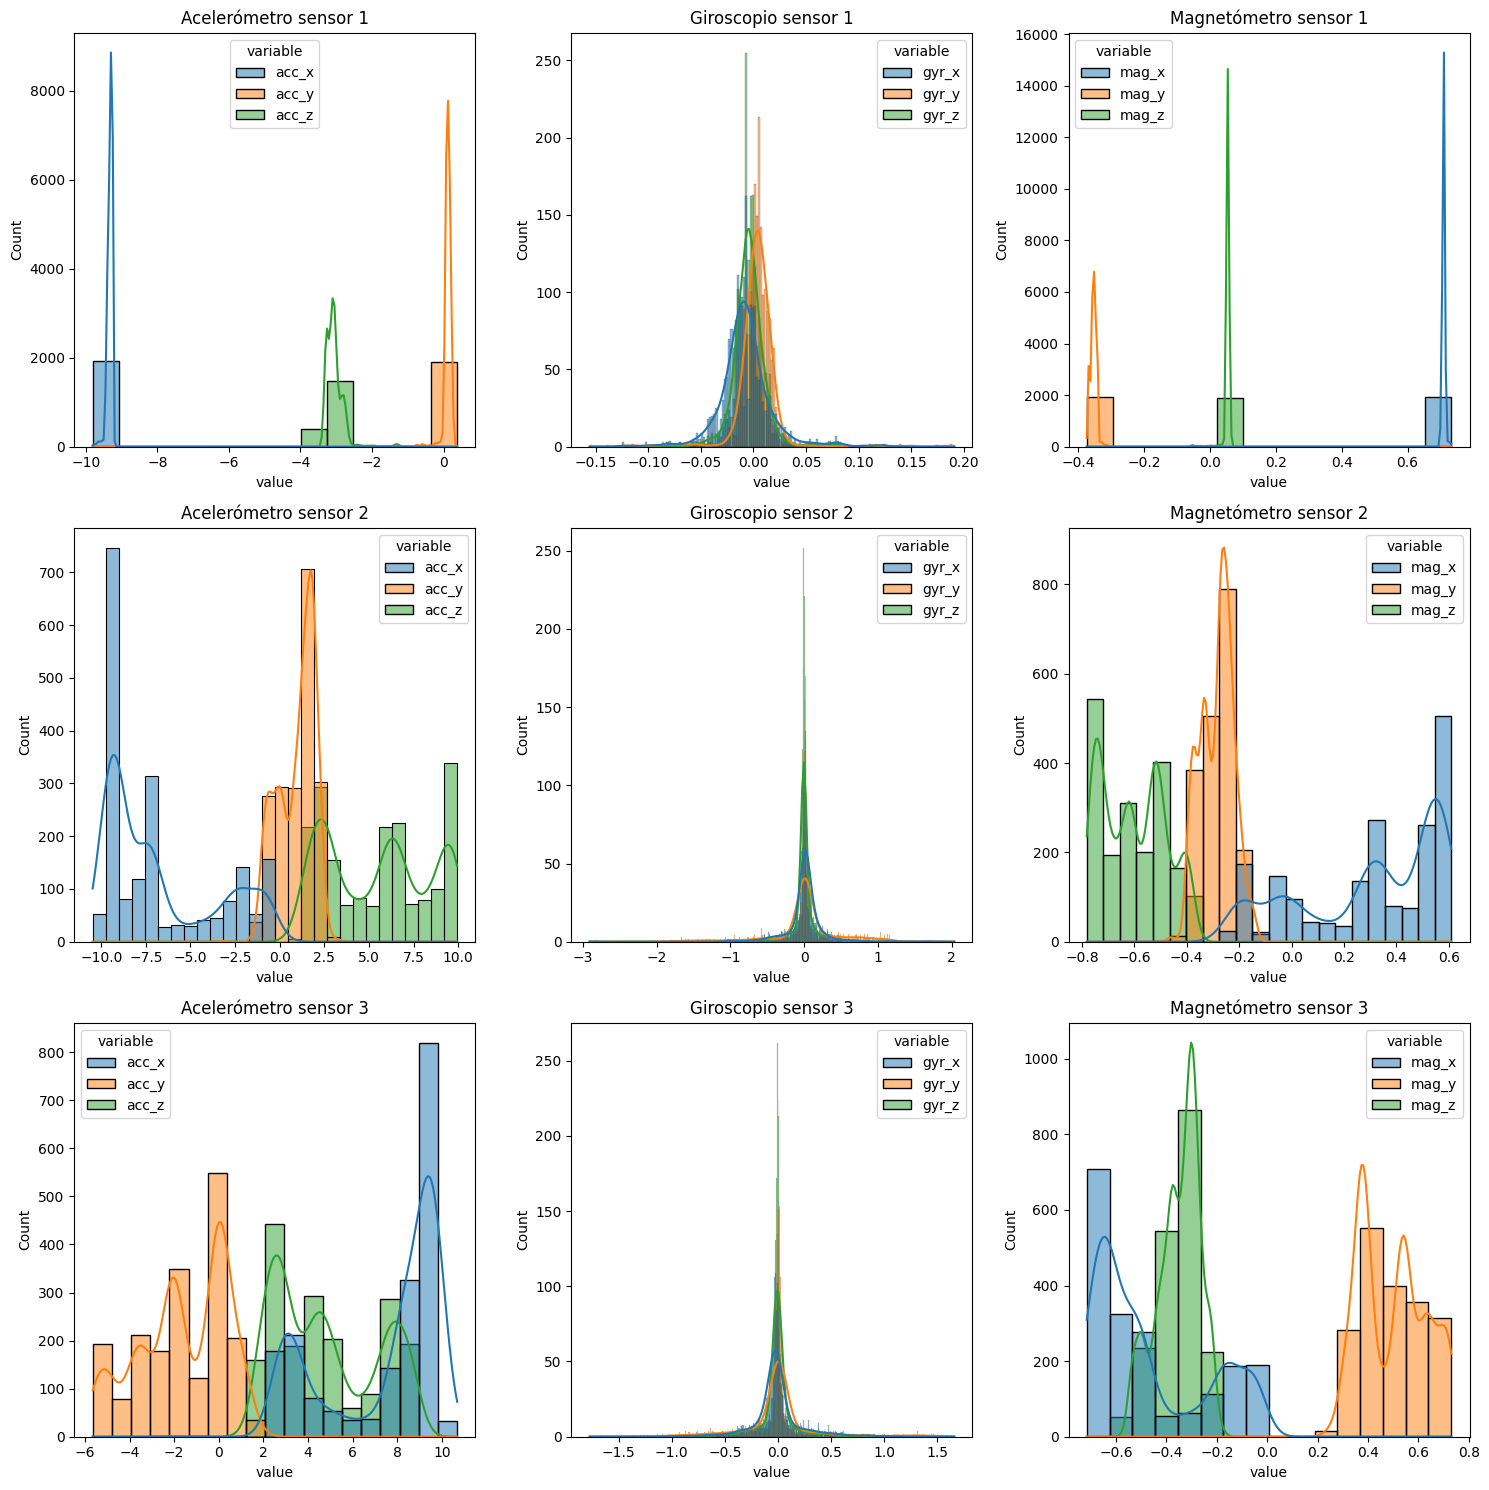

In [9]:
suj = 0
eje = 6

fig, axes = plt.subplots(3, 3, figsize=(15, 15))

sns.histplot(sujetoTrain[suj][eje][0][['acc_x', 'acc_y', 'acc_z']].melt(value_name='value'), x='value', hue='variable', ax=axes[0,0], kde=True)
axes[0,0].set_title('Acelerómetro sensor 1')
sns.histplot(sujetoTrain[suj][eje][0][['gyr_x', 'gyr_y', 'gyr_z']].melt(value_name='value'), x='value', hue='variable', ax=axes[0,1], kde=True)
axes[0,1].set_title('Giroscopio sensor 1')
sns.histplot(sujetoTrain[suj][eje][0][['mag_x', 'mag_y', 'mag_z']].melt(value_name='value'), x='value', hue='variable', ax=axes[0,2], kde=True)
axes[0,2].set_title('Magnetómetro sensor 1')

sns.histplot(sujetoTrain[suj][eje][1][['acc_x', 'acc_y', 'acc_z']].melt(value_name='value'), x='value', hue='variable', ax=axes[1,0], kde=True)
axes[1,0].set_title('Acelerómetro sensor 2')
sns.histplot(sujetoTrain[suj][eje][1][['gyr_x', 'gyr_y', 'gyr_z']].melt(value_name='value'), x='value', hue='variable', ax=axes[1,1], kde=True)
axes[1,1].set_title('Giroscopio sensor 2')
sns.histplot(sujetoTrain[suj][eje][1][['mag_x', 'mag_y', 'mag_z']].melt(value_name='value'), x='value', hue='variable', ax=axes[1,2], kde=True)
axes[1,2].set_title('Magnetómetro sensor 2')

sns.histplot(sujetoTrain[suj][eje][2][['acc_x', 'acc_y', 'acc_z']].melt(value_name='value'), x='value', hue='variable', ax=axes[2,0], kde=True)
axes[2,0].set_title('Acelerómetro sensor 3')
sns.histplot(sujetoTrain[suj][eje][2][['gyr_x', 'gyr_y', 'gyr_z']].melt(value_name='value'), x='value', hue='variable', ax=axes[2,1], kde=True)
axes[2,1].set_title('Giroscopio sensor 3')
sns.histplot(sujetoTrain[suj][eje][2][['mag_x', 'mag_y', 'mag_z']].melt(value_name='value'), x='value', hue='variable', ax=axes[2,2], kde=True)
axes[2,2].set_title('Magnetómetro sensor 3')

plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


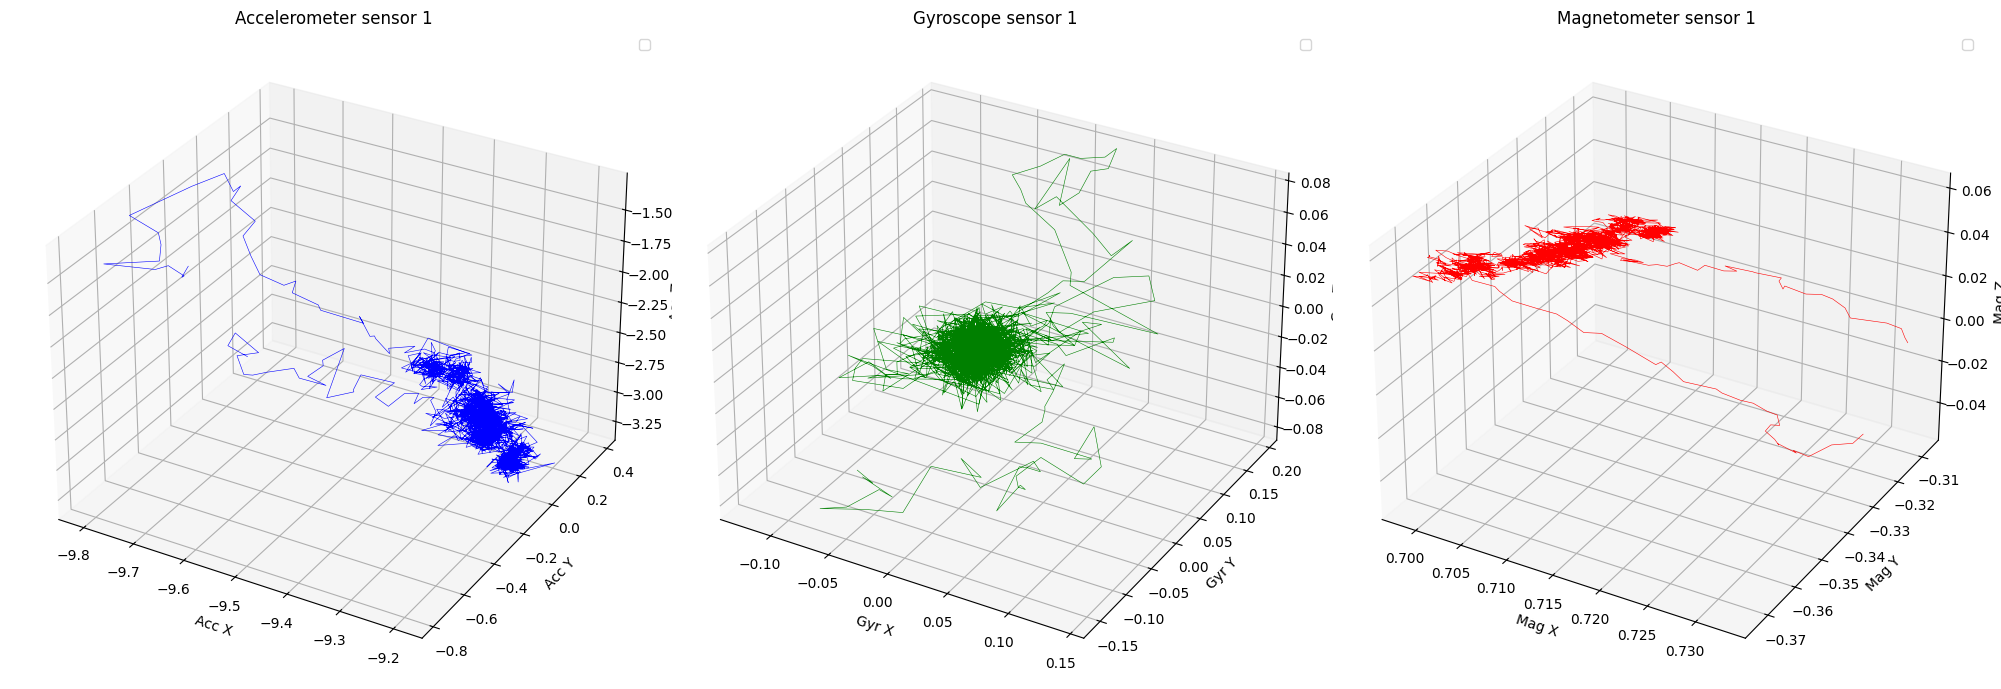

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


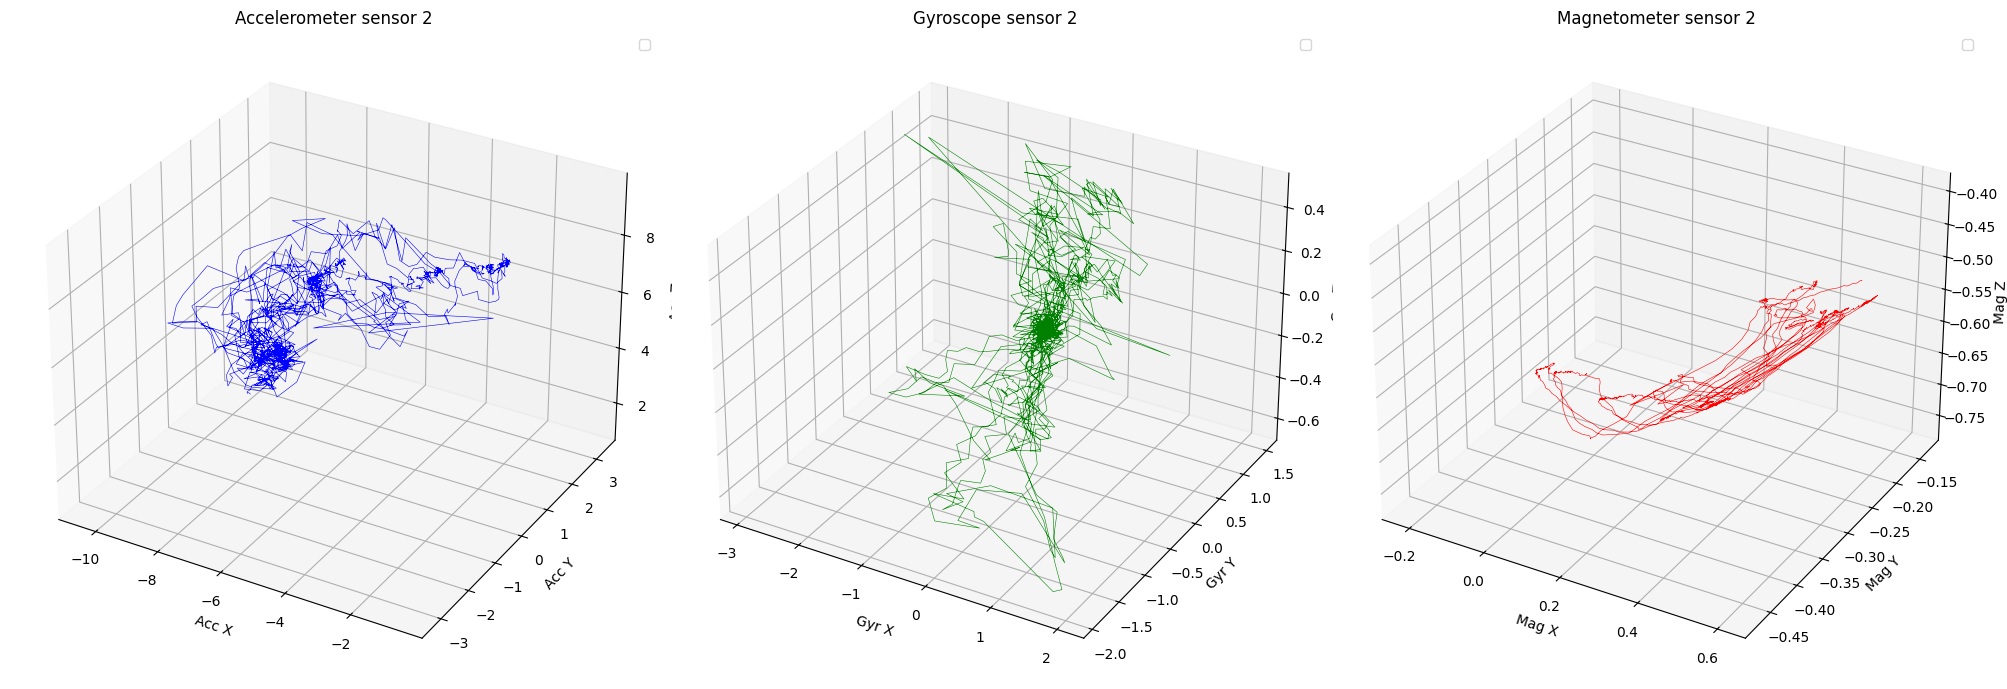

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


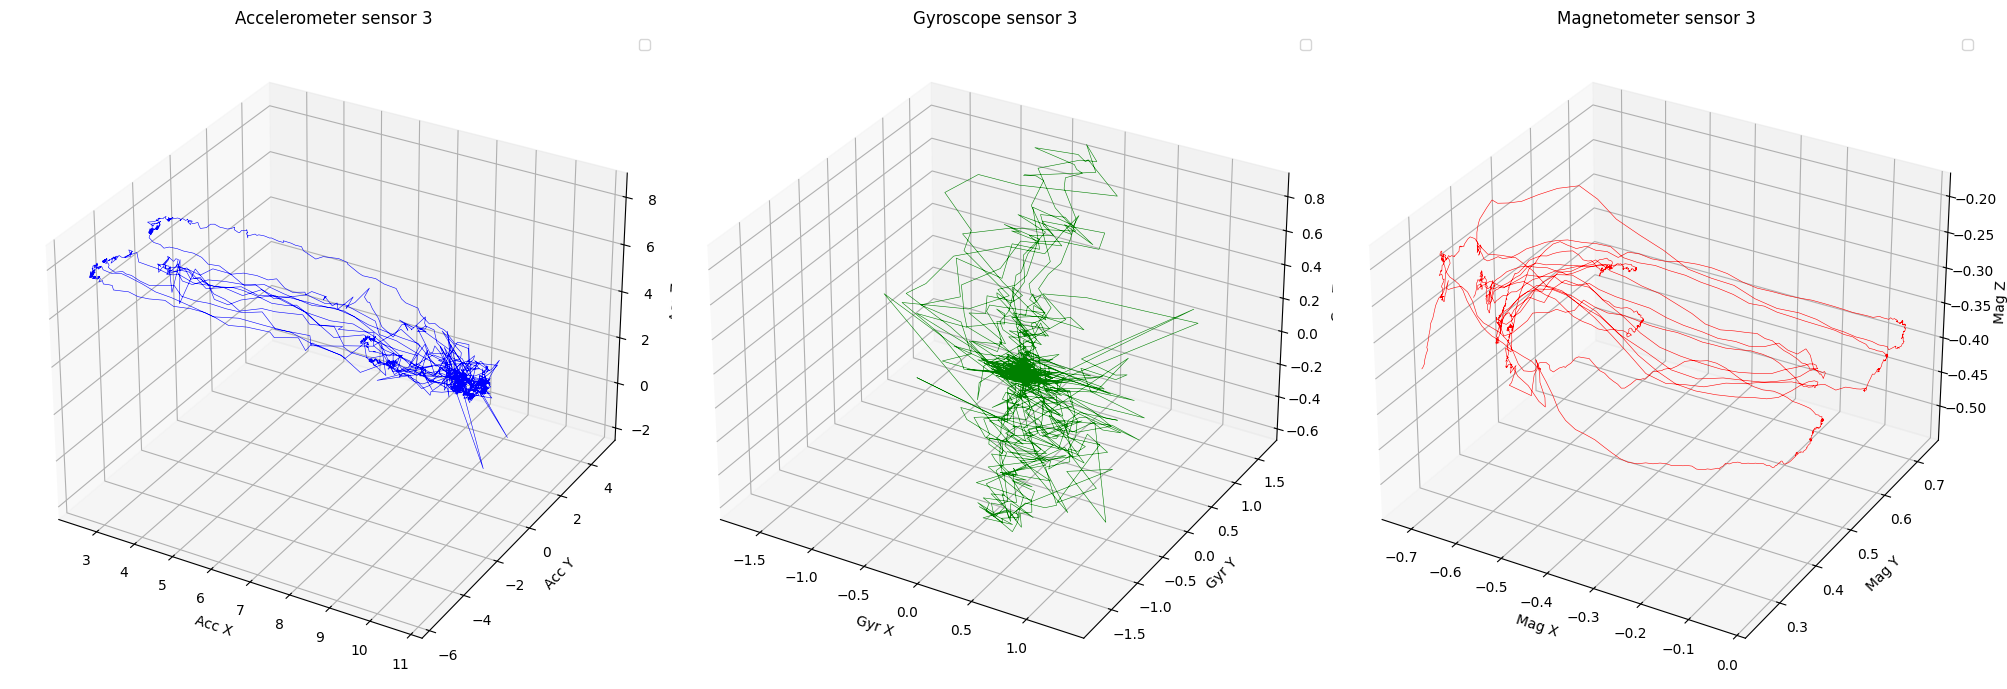

In [10]:
suj = 0
eje = 6

fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(131, projection='3d')
ax1.plot(sujetoTrain[suj][eje][0]['acc_x'], sujetoTrain[suj][eje][0]['acc_y'], sujetoTrain[suj][eje][0]['acc_z'], color='blue', linewidth=0.4)
ax1.set_xlabel('Acc X')
ax1.set_ylabel('Acc Y')
ax1.set_zlabel('Acc Z')
ax1.set_title('Accelerometer sensor 1')
ax1.legend()
ax2 = fig.add_subplot(132, projection='3d')
ax2.plot(sujetoTrain[suj][eje][0]['gyr_x'], sujetoTrain[suj][eje][0]['gyr_y'], sujetoTrain[suj][eje][0]['gyr_z'], color='green', linewidth=0.4)
ax2.set_xlabel('Gyr X')
ax2.set_ylabel('Gyr Y')
ax2.set_zlabel('Gyr Z')
ax2.set_title('Gyroscope sensor 1')
ax2.legend()
ax3 = fig.add_subplot(133, projection='3d')
ax3.plot(sujetoTrain[suj][eje][0]['mag_x'], sujetoTrain[suj][eje][0]['mag_y'], sujetoTrain[suj][eje][0]['mag_z'], color='red', linewidth=0.4)
ax3.set_xlabel('Mag X')
ax3.set_ylabel('Mag Y')
ax3.set_zlabel('Mag Z')
ax3.set_title('Magnetometer sensor 1')
ax3.legend()

plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(131, projection='3d')
ax1.plot(sujetoTrain[suj][eje][1]['acc_x'], sujetoTrain[suj][eje][1]['acc_y'], sujetoTrain[suj][eje][1]['acc_z'], color='blue', linewidth=0.4)
ax1.set_xlabel('Acc X')
ax1.set_ylabel('Acc Y')
ax1.set_zlabel('Acc Z')
ax1.set_title('Accelerometer sensor 2')
ax1.legend()
ax2 = fig.add_subplot(132, projection='3d')
ax2.plot(sujetoTrain[suj][eje][1]['gyr_x'], sujetoTrain[suj][eje][1]['gyr_y'], sujetoTrain[suj][eje][1]['gyr_z'], color='green', linewidth=0.4)
ax2.set_xlabel('Gyr X')
ax2.set_ylabel('Gyr Y')
ax2.set_zlabel('Gyr Z')
ax2.set_title('Gyroscope sensor 2')
ax2.legend()
ax3 = fig.add_subplot(133, projection='3d')
ax3.plot(sujetoTrain[suj][eje][1]['mag_x'], sujetoTrain[suj][eje][1]['mag_y'], sujetoTrain[suj][eje][1]['mag_z'], color='red', linewidth=0.4)
ax3.set_xlabel('Mag X')
ax3.set_ylabel('Mag Y')
ax3.set_zlabel('Mag Z')
ax3.set_title('Magnetometer sensor 2')
ax3.legend()

plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(131, projection='3d')
ax1.plot(sujetoTrain[suj][eje][2]['acc_x'], sujetoTrain[suj][eje][2]['acc_y'], sujetoTrain[suj][eje][2]['acc_z'], color='blue', linewidth=0.4)
ax1.set_xlabel('Acc X')
ax1.set_ylabel('Acc Y')
ax1.set_zlabel('Acc Z')
ax1.set_title('Accelerometer sensor 3')
ax1.legend()
ax2 = fig.add_subplot(132, projection='3d')
ax2.plot(sujetoTrain[suj][eje][2]['gyr_x'], sujetoTrain[suj][eje][2]['gyr_y'], sujetoTrain[suj][eje][2]['gyr_z'], color='green', linewidth=0.4)
ax2.set_xlabel('Gyr X')
ax2.set_ylabel('Gyr Y')
ax2.set_zlabel('Gyr Z')
ax2.set_title('Gyroscope sensor 3')
ax2.legend()
ax3 = fig.add_subplot(133, projection='3d')
ax3.plot(sujetoTrain[suj][eje][2]['mag_x'], sujetoTrain[suj][eje][2]['mag_y'], sujetoTrain[suj][eje][2]['mag_z'], color='red', linewidth=0.4)
ax3.set_xlabel('Mag X')
ax3.set_ylabel('Mag Y')
ax3.set_zlabel('Mag Z')
ax3.set_title('Magnetometer sensor 3')
ax3.legend()

plt.tight_layout()
plt.show()

### 3.7.2. sujeto de prueba 2 con sensor 1, 2 y 3

visualizaremos los registros de sensor 1 ubicado en la rodilla del pie derecho, el sensor 2 ubicado en la parte de la muñeca derecha y el sensor 3 unicado en la parte del biceps derecho

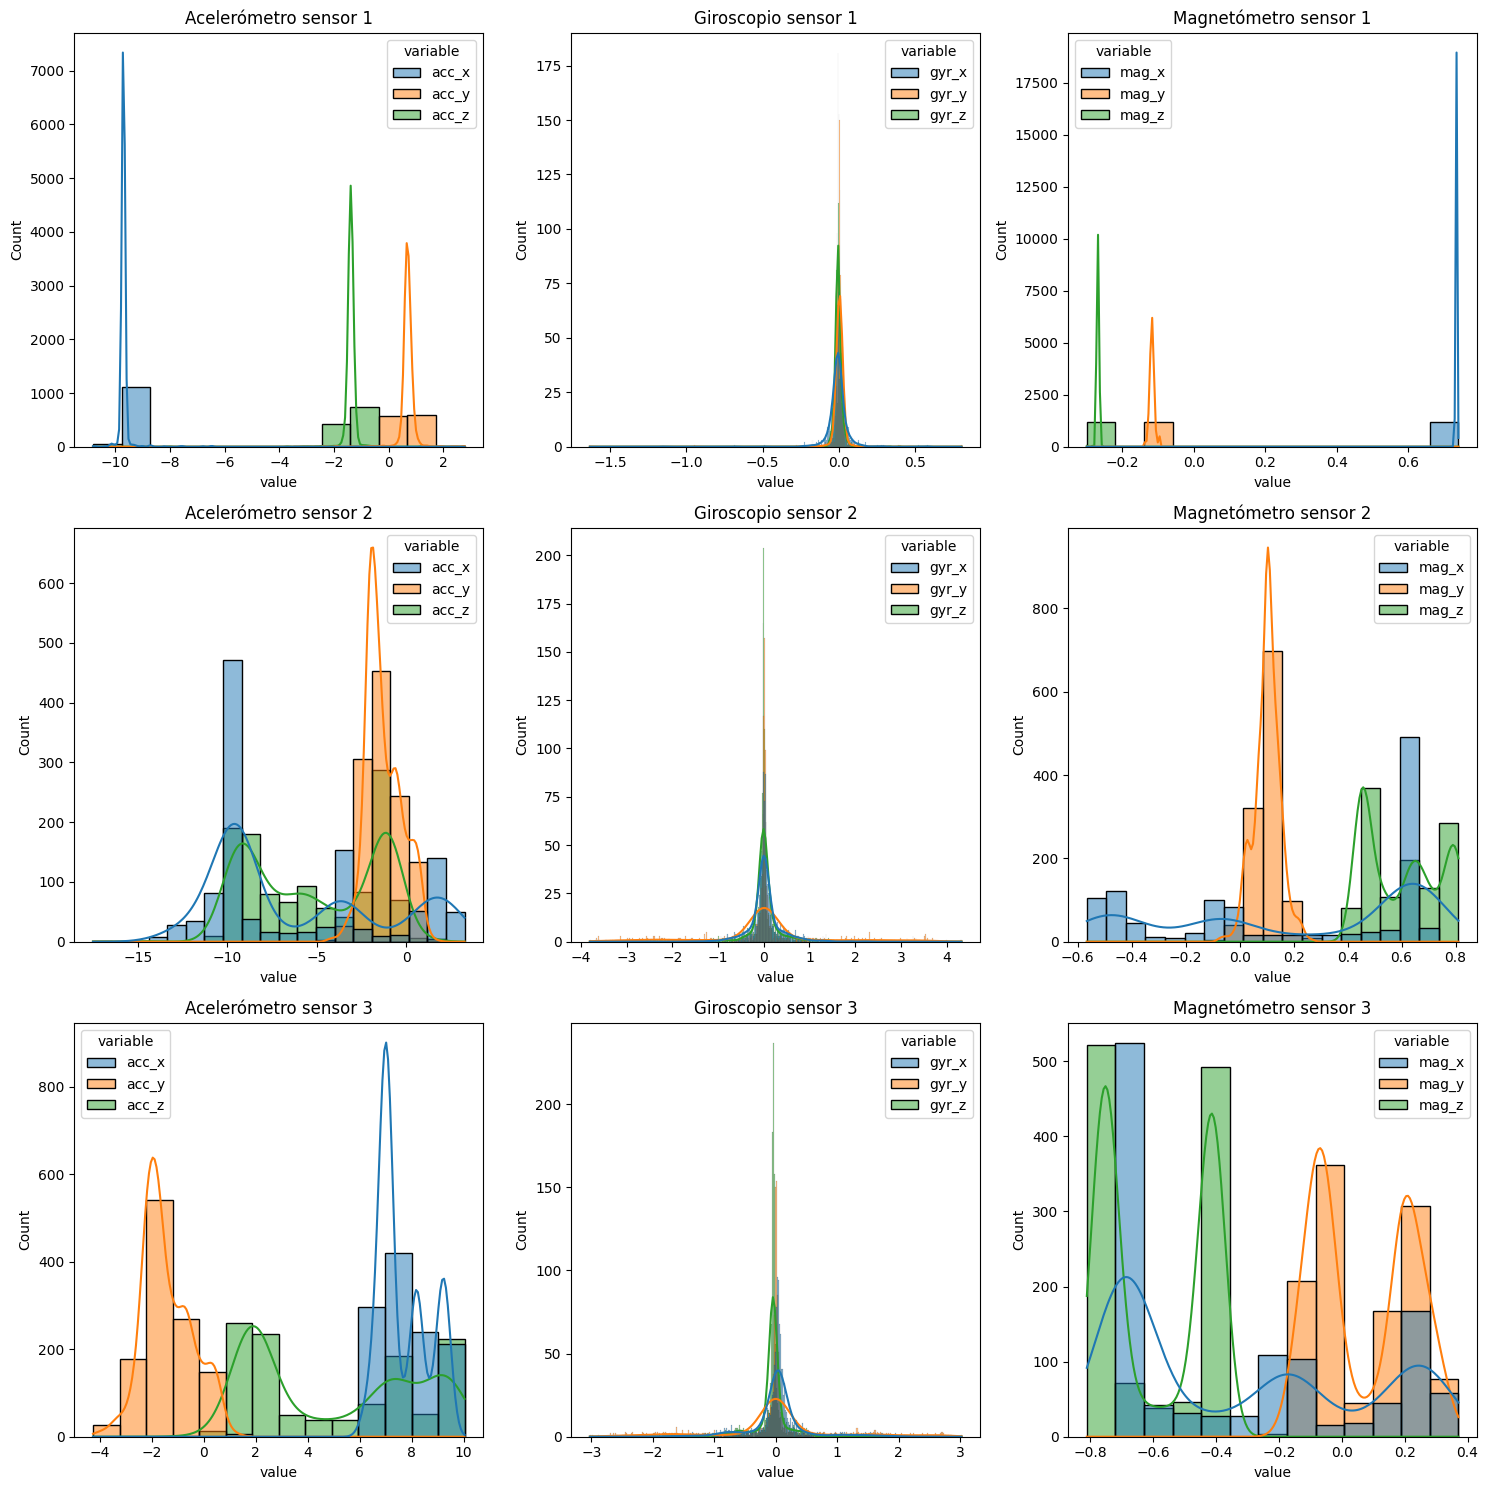

In [11]:
suj = 1
eje = 6

fig, axes = plt.subplots(3, 3, figsize=(15, 15))

sns.histplot(sujetoTrain[suj][eje][0][['acc_x', 'acc_y', 'acc_z']].melt(value_name='value'), x='value', hue='variable', ax=axes[0,0], kde=True)
axes[0,0].set_title('Acelerómetro sensor 1')
sns.histplot(sujetoTrain[suj][eje][0][['gyr_x', 'gyr_y', 'gyr_z']].melt(value_name='value'), x='value', hue='variable', ax=axes[0,1], kde=True)
axes[0,1].set_title('Giroscopio sensor 1')
sns.histplot(sujetoTrain[suj][eje][0][['mag_x', 'mag_y', 'mag_z']].melt(value_name='value'), x='value', hue='variable', ax=axes[0,2], kde=True)
axes[0,2].set_title('Magnetómetro sensor 1')

sns.histplot(sujetoTrain[suj][eje][1][['acc_x', 'acc_y', 'acc_z']].melt(value_name='value'), x='value', hue='variable', ax=axes[1,0], kde=True)
axes[1,0].set_title('Acelerómetro sensor 2')
sns.histplot(sujetoTrain[suj][eje][1][['gyr_x', 'gyr_y', 'gyr_z']].melt(value_name='value'), x='value', hue='variable', ax=axes[1,1], kde=True)
axes[1,1].set_title('Giroscopio sensor 2')
sns.histplot(sujetoTrain[suj][eje][1][['mag_x', 'mag_y', 'mag_z']].melt(value_name='value'), x='value', hue='variable', ax=axes[1,2], kde=True)
axes[1,2].set_title('Magnetómetro sensor 2')

sns.histplot(sujetoTrain[suj][eje][2][['acc_x', 'acc_y', 'acc_z']].melt(value_name='value'), x='value', hue='variable', ax=axes[2,0], kde=True)
axes[2,0].set_title('Acelerómetro sensor 3')
sns.histplot(sujetoTrain[suj][eje][2][['gyr_x', 'gyr_y', 'gyr_z']].melt(value_name='value'), x='value', hue='variable', ax=axes[2,1], kde=True)
axes[2,1].set_title('Giroscopio sensor 3')
sns.histplot(sujetoTrain[suj][eje][2][['mag_x', 'mag_y', 'mag_z']].melt(value_name='value'), x='value', hue='variable', ax=axes[2,2], kde=True)
axes[2,2].set_title('Magnetómetro sensor 3')

plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


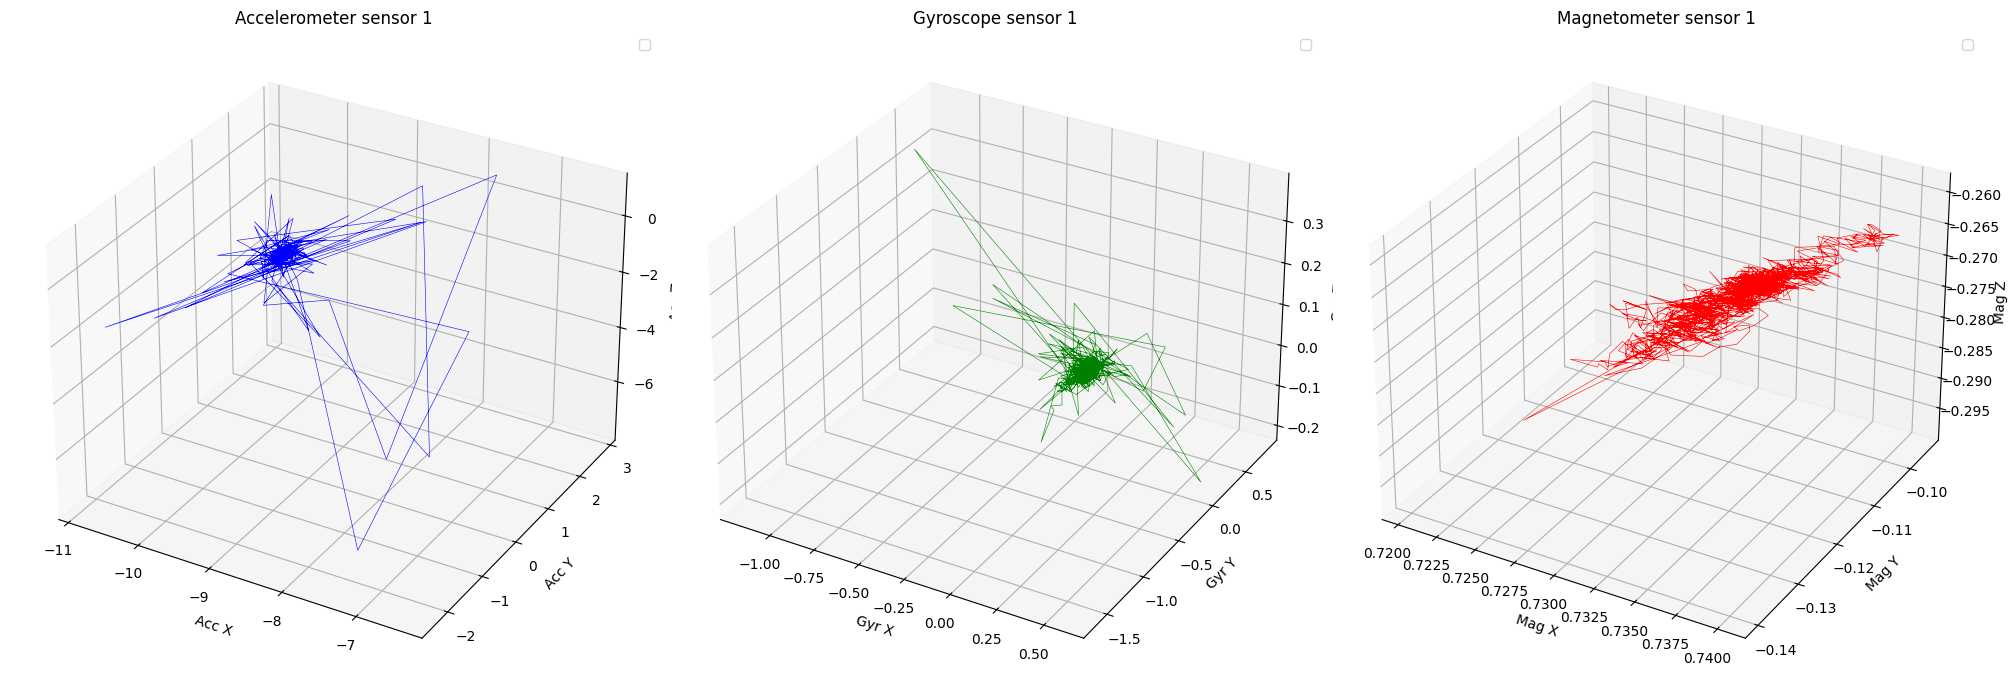

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


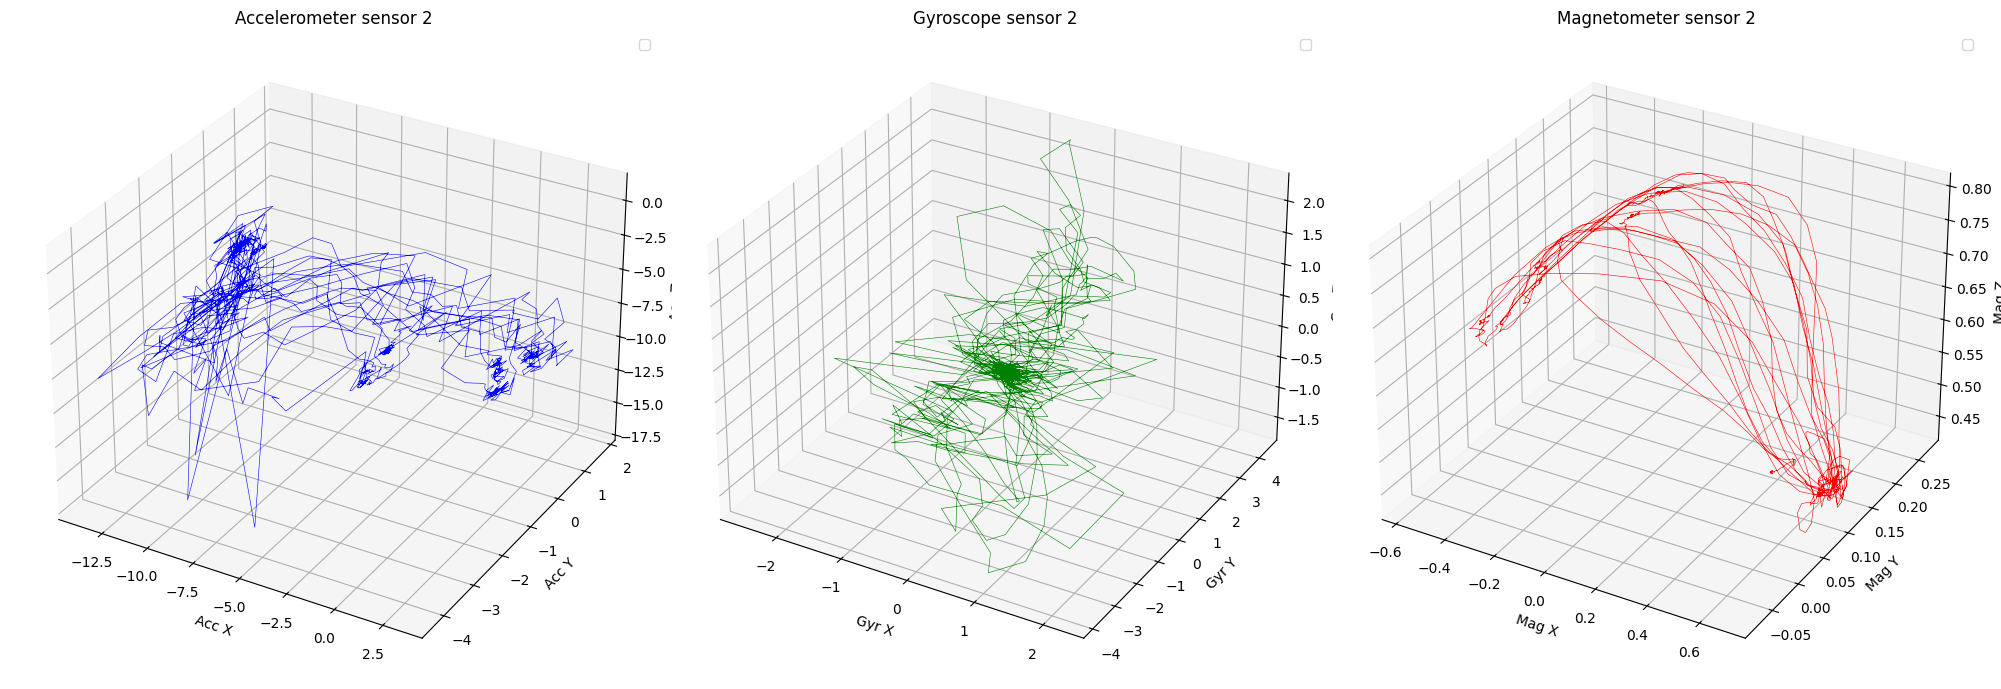

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


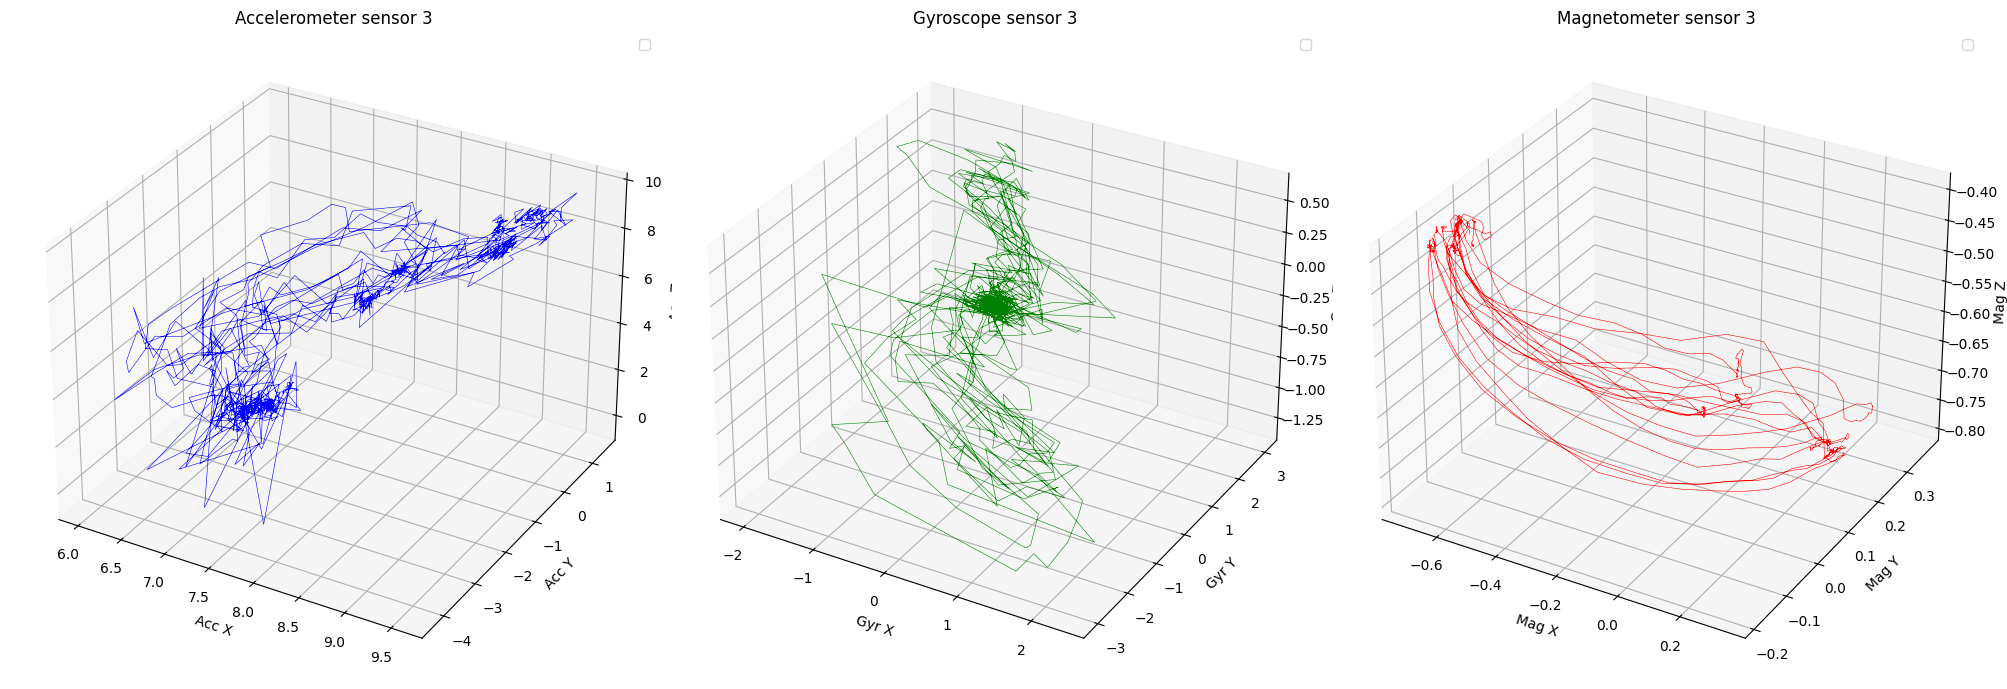

In [12]:
suj = 1
eje = 6

fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(131, projection='3d')
ax1.plot(sujetoTrain[suj][eje][0]['acc_x'], sujetoTrain[suj][eje][0]['acc_y'], sujetoTrain[suj][eje][0]['acc_z'], color='blue', linewidth=0.4)
ax1.set_xlabel('Acc X')
ax1.set_ylabel('Acc Y')
ax1.set_zlabel('Acc Z')
ax1.set_title('Accelerometer sensor 1')
ax1.legend()
ax2 = fig.add_subplot(132, projection='3d')
ax2.plot(sujetoTrain[suj][eje][0]['gyr_x'], sujetoTrain[suj][eje][0]['gyr_y'], sujetoTrain[suj][eje][0]['gyr_z'], color='green', linewidth=0.4)
ax2.set_xlabel('Gyr X')
ax2.set_ylabel('Gyr Y')
ax2.set_zlabel('Gyr Z')
ax2.set_title('Gyroscope sensor 1')
ax2.legend()
ax3 = fig.add_subplot(133, projection='3d')
ax3.plot(sujetoTrain[suj][eje][0]['mag_x'], sujetoTrain[suj][eje][0]['mag_y'], sujetoTrain[suj][eje][0]['mag_z'], color='red', linewidth=0.4)
ax3.set_xlabel('Mag X')
ax3.set_ylabel('Mag Y')
ax3.set_zlabel('Mag Z')
ax3.set_title('Magnetometer sensor 1')
ax3.legend()

plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(131, projection='3d')
ax1.plot(sujetoTrain[suj][eje][1]['acc_x'], sujetoTrain[suj][eje][1]['acc_y'], sujetoTrain[suj][eje][1]['acc_z'], color='blue', linewidth=0.4)
ax1.set_xlabel('Acc X')
ax1.set_ylabel('Acc Y')
ax1.set_zlabel('Acc Z')
ax1.set_title('Accelerometer sensor 2')
ax1.legend()
ax2 = fig.add_subplot(132, projection='3d')
ax2.plot(sujetoTrain[suj][eje][1]['gyr_x'], sujetoTrain[suj][eje][1]['gyr_y'], sujetoTrain[suj][eje][1]['gyr_z'], color='green', linewidth=0.4)
ax2.set_xlabel('Gyr X')
ax2.set_ylabel('Gyr Y')
ax2.set_zlabel('Gyr Z')
ax2.set_title('Gyroscope sensor 2')
ax2.legend()
ax3 = fig.add_subplot(133, projection='3d')
ax3.plot(sujetoTrain[suj][eje][1]['mag_x'], sujetoTrain[suj][eje][1]['mag_y'], sujetoTrain[suj][eje][1]['mag_z'], color='red', linewidth=0.4)
ax3.set_xlabel('Mag X')
ax3.set_ylabel('Mag Y')
ax3.set_zlabel('Mag Z')
ax3.set_title('Magnetometer sensor 2')
ax3.legend()

plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(131, projection='3d')
ax1.plot(sujetoTrain[suj][eje][2]['acc_x'], sujetoTrain[suj][eje][2]['acc_y'], sujetoTrain[suj][eje][2]['acc_z'], color='blue', linewidth=0.4)
ax1.set_xlabel('Acc X')
ax1.set_ylabel('Acc Y')
ax1.set_zlabel('Acc Z')
ax1.set_title('Accelerometer sensor 3')
ax1.legend()
ax2 = fig.add_subplot(132, projection='3d')
ax2.plot(sujetoTrain[suj][eje][2]['gyr_x'], sujetoTrain[suj][eje][2]['gyr_y'], sujetoTrain[suj][eje][2]['gyr_z'], color='green', linewidth=0.4)
ax2.set_xlabel('Gyr X')
ax2.set_ylabel('Gyr Y')
ax2.set_zlabel('Gyr Z')
ax2.set_title('Gyroscope sensor 3')
ax2.legend()
ax3 = fig.add_subplot(133, projection='3d')
ax3.plot(sujetoTrain[suj][eje][2]['mag_x'], sujetoTrain[suj][eje][2]['mag_y'], sujetoTrain[suj][eje][2]['mag_z'], color='red', linewidth=0.4)
ax3.set_xlabel('Mag X')
ax3.set_ylabel('Mag Y')
ax3.set_zlabel('Mag Z')
ax3.set_title('Magnetometer sensor 3')
ax3.legend()

plt.tight_layout()
plt.show()

podemos ver entre los ejercicios 

# 4. Construccion de los pliegues

Esta función retornará las particiones cuando se solicite 

In [13]:
def ParticionTrainValTest(dfSensor, t=7):

    X_train = []
    y_train = []
    X_val = []
    y_val = []
    X_test = []
    y_test = []

    # TRAIN len(14)
    for i in range(14):
        inicio = i
        fin = inicio + t
        X_train.append(dfSensor[inicio : fin])
        y_train.append(dfSensor[fin : fin + 1])

    # VAL len(7)
    for i in range(7):
        inicio = 14 + i
        fin = inicio + t
        X_val.append(dfSensor[inicio : fin])
        y_val.append(dfSensor[fin : fin + 1])

    # TEST len(7)
    for i in range(7):
        inicio = 14 + 7 + i
        fin = inicio + t
        X_test.append(dfSensor[inicio : fin])
        y_test.append(dfSensor[fin : fin + 1])

    return np.array(X_train), np.array(y_train), np.array(X_val), np.array(y_val), np.array(X_test), np.array(y_test)


visualización de como se usa `ParticionTrainValTest`:

In [14]:
t = 7
vals = np.arange(40).reshape(-1, 1)
X_train, y_train, X_val, y_val, X_test, y_test = ParticionTrainValTest(vals, t)

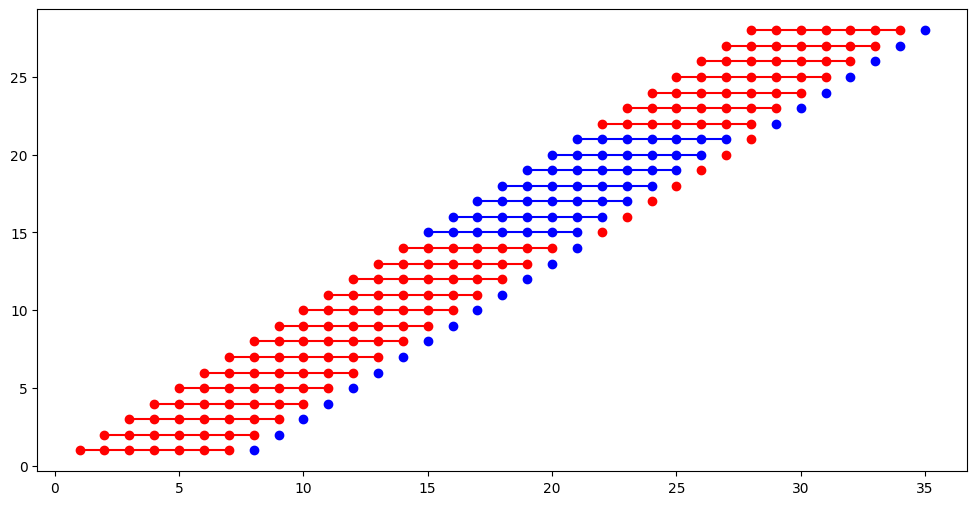

In [15]:
fig, ax = plt.subplots(figsize=(12, 6))

#TRAIN
for i in range(14):
    ax.plot(range(i+1, i+1+t), [i + 1] * t, marker='o', color='red')
    ax.plot(i+1+t, i+1, marker='o', color='blue')

#VAL
for i in range(7):
    ax.plot(range(14+i+1 , 14+i+1+t), [14 + i + 1] * t, marker='o', color='blue')
    ax.plot(14+i+1+t , 14+i+1, marker='o', color='red')

#TEST
for i in range(7):
    ax.plot(range(14+7+i+1, 14+7+i+1+t), [14 + 7 + i + 1] * t, marker='o', color='red')
    ax.plot(14+7+i+1+t, 14+7+i+1, marker='o', color='blue')

In [16]:
def calMetricas(y_true, y_pred):
    mape = np.mean(np.abs((y_true - y_pred) / y_true )) * 100
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)

    residuos = y_true - y_pred

    ljung_box_pvalue = acorr_ljungbox(residuos, lags=[1], return_df=True)['lb_pvalue'].iloc[0]
    jb_stat, jb_pvalue, _, _ = jarque_bera(residuos)
    
    return mape, rmse, r2, ljung_box_pvalue, jb_pvalue

# 5. Modelos

Se escogera el sujeto de prueba `3` el cual procederemos a modelar sus muestras recogidas y de todos los modelos el pipeline se escogerá hiperparametros fijos

In [17]:
modelos = {
    "K-NN": KNeighborsRegressor(n_neighbors=3),
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.1),
    "Random Forest": RandomForestRegressor(n_estimators=200),
    "XGBoost": xgb.XGBRegressor(),
    "SVR": SVR(kernel='poly')
}

In [18]:
sujeto = sujetoTrain[2].copy()

## 5.1 Ventana =7

In [19]:
resModelos = []

t = 7

contEje = 1
for ejercicio in sujeto:

    print(f"entrenando s3e{contEje} y sensores 1-5...")

    contSen = 1
    for sensor in ejercicio:

        valSensor = sensor.values

        X_train, y_train, X_val, y_val, X_test, y_test = ParticionTrainValTest(valSensor, t)

        for nombre_modelo, modelo in modelos.items():
            #print(f"{nombre_modelo}...")

            try:

                modelo.fit(X_train.reshape(-1, t), y_train.flatten())

                y_pred_val = modelo.predict(X_val.reshape(-1, t))
                mape_val, rmse_val, r2_val, ljungbox_val, jb_pvalue_val =  calMetricas(y_val.flatten(), y_pred_val)

                y_pred_test = modelo.predict(X_test.reshape(-1, t))
                mape_test, rmse_test, r2_test, ljungbox_test, jb_pvalue_test =  calMetricas(y_test.flatten(), y_pred_test)

                resModelos.append({
                    "id": f"s3e{contEje}u{contSen}",
                    "Modelo": nombre_modelo,
                    "MAPE Val": mape_val, "RMSE Val": rmse_val, "R2 Val": r2_val, "Ljung-Box Val":ljungbox_val,  "Jarque-Bera Val":jb_pvalue_val,
                    "MAPE Test": mape_test, "RMSE Test": rmse_test, "R2 Test": r2_test, "Ljung-Box Test":ljungbox_test,  "Jarque-Bera Test":jb_pvalue_test
                })
                
            except Exception as e:
                print(f"error entrenando s3e{contEje}u{contSen} - {e}")

            #break # un solo modelo

        contSen += 1
        #break # un solo sensor

    contEje += 1
    #break #un solo ejercicio
          

entrenando s3e1 y sensores 1-5...


entrenando s3e2 y sensores 1-5...


entrenando s3e3 y sensores 1-5...


entrenando s3e4 y sensores 1-5...


entrenando s3e5 y sensores 1-5...


entrenando s3e6 y sensores 1-5...


entrenando s3e7 y sensores 1-5...


entrenando s3e8 y sensores 1-5...


In [20]:
dfResModelos = pd.DataFrame(resModelos)
dfResModelos.to_csv('dfResModelos_t7.csv', index=False)
dfResModelos

id             Modelo     MAPE Val  RMSE Val    R2 Val  \
0    s3e1u1               K-NN    46.700680  0.025479  0.999935   
1    s3e1u1  Linear Regression  2322.685815  0.521609  0.972729   
2    s3e1u1              Ridge  2313.230629  0.521622  0.972728   
3    s3e1u1              Lasso  2461.179054  0.526884  0.972174   
4    s3e1u1      Random Forest    37.160906  0.029234  0.999914   
..      ...                ...          ...       ...       ...   
275  s3e8u5              Ridge  1228.520947  0.347786  0.988421   
276  s3e8u5              Lasso  1810.624111  0.375338  0.986514   
277  s3e8u5      Random Forest    54.395524  0.021787  0.999955   
278  s3e8u5            XGBoost    55.767996  2.176750  0.546415   
279  s3e8u5                SVR   485.346457  0.094153  0.999151   

     Ljung-Box Val  Jarque-Bera Val    MAPE Test  RMSE Test   R2 Test  \
0         0.673498     4.625688e-04    44.050521   0.046217  0.999784   
1         0.314967     5.707087e-02  1875.708981   0.512752  0.973427   
2         0.306241     5.466477e-02  1867.349036   0.512692  0.973433   
3         0.141135     2.529736e-01  1986.786329   0.516609  0.973025   
4         0.902521     5.837559e-07    33.797189   0.047820  0.999769   
..             ...              ...          ...        ...       ...   
275       0.292338     1.205375e-02  1261.077808   0.351141  0.988156   
276       0.112137     4.500070e-08  1738.940186   0.378201  0.986260   
277       0.311537     3.626242e-02    36.886044   0.047084  0.999787   
278       0.940101    1.593527e-104    69.110959   2.978018  0.148117   
279       0.304823     1.040872e-04   365.254201   0.075710  0.999449   

     Ljung-Box Test  Jarque-Bera Test  
0          0.014523      2.201872e-07  
1          0.473880      6.617168e-02  
2          0.463062      6.369045e-02  
3          0.242265      1.995727e-01  
4          0.443467      2.225426e-08  
..              ...               ...  
275        0.285498      1.316830e-02  
276        0.114399      4.384100e-08  
277        0.347943      8.552502e-37  
278        0.716865      2.436054e-24  
279        0.458608      1.871466e-02  

[280 rows x 12 columns]

## 5.2 Ventana =14

In [21]:
resModelos = []

t = 14

contEje = 1
for ejercicio in sujeto:

    print(f"entrenando s3e{contEje} y sensores 1-5...")

    contSen = 1
    for sensor in ejercicio:

        valSensor = sensor.values

        X_train, y_train, X_val, y_val, X_test, y_test = ParticionTrainValTest(valSensor, t)

        for nombre_modelo, modelo in modelos.items():
            #print(f"{nombre_modelo}...")

            try:

                modelo.fit(X_train.reshape(-1, t), y_train.flatten())

                y_pred_val = modelo.predict(X_val.reshape(-1, t))
                mape_val, rmse_val, r2_val, ljungbox_val, jb_pvalue_val =  calMetricas(y_val.flatten(), y_pred_val)

                y_pred_test = modelo.predict(X_test.reshape(-1, t))
                mape_test, rmse_test, r2_test, ljungbox_test, jb_pvalue_test =  calMetricas(y_test.flatten(), y_pred_test)

                resModelos.append({
                    "id": f"s3e{contEje}u{contSen}",
                    "Modelo": nombre_modelo,
                    "MAPE Val": mape_val, "RMSE Val": rmse_val, "R2 Val": r2_val, "Ljung-Box Val":ljungbox_val,  "Jarque-Bera Val":jb_pvalue_val,
                    "MAPE Test": mape_test, "RMSE Test": rmse_test, "R2 Test": r2_test, "Ljung-Box Test":ljungbox_test,  "Jarque-Bera Test":jb_pvalue_test
                })
                
            except Exception as e:
                print(f"error entrenando s3e{contEje}u{contSen} - {e}")

            #break # un solo modelo

        contSen += 1
        #break # un solo sensor

    contEje += 1
    #break #un solo ejercicio

entrenando s3e1 y sensores 1-5...


entrenando s3e2 y sensores 1-5...


entrenando s3e3 y sensores 1-5...


entrenando s3e4 y sensores 1-5...


entrenando s3e5 y sensores 1-5...


entrenando s3e6 y sensores 1-5...


entrenando s3e7 y sensores 1-5...


entrenando s3e8 y sensores 1-5...


In [22]:
dfResModelos = pd.DataFrame(resModelos)
dfResModelos.to_csv('dfResModelos_t14.csv', index=False)
dfResModelos

id             Modelo    MAPE Val  RMSE Val    R2 Val  Ljung-Box Val  \
0    s3e1u1               K-NN   46.663318  0.048293  0.999764       0.009275   
1    s3e1u1  Linear Regression   78.833418  0.043835  0.999806       0.189450   
2    s3e1u1              Ridge   77.919714  0.044119  0.999803       0.188401   
3    s3e1u1              Lasso  359.657178  0.087672  0.999223       0.000791   
4    s3e1u1      Random Forest   51.587647  0.047743  0.999770       0.011600   
..      ...                ...         ...       ...       ...            ...   
275  s3e8u5              Ridge   67.790768  0.038984  0.999854       0.784939   
276  s3e8u5              Lasso  282.805401  0.081825  0.999357       0.019298   
277  s3e8u5      Random Forest   37.945361  0.030628  0.999910       0.999221   
278  s3e8u5            XGBoost   44.173746  0.034358  0.999887       0.681745   
279  s3e8u5                SVR  280.316244  0.090507  0.999213       0.122560   

     Jarque-Bera Val    MAPE Test  RMSE Test   R2 Test  Ljung-Box Test  \
0       1.453713e-12    64.887719   0.078499  0.999382        0.454171   
1       5.783999e-04   119.342240   0.077881  0.999392        0.343438   
2       3.840730e-04   123.038574   0.079781  0.999362        0.605510   
3       8.487081e-02   419.448831   0.107627  0.998839        0.006825   
4       1.095692e-05    72.650446   0.078021  0.999390        0.346157   
..               ...          ...        ...       ...             ...   
275     1.702117e-48   122.141957   0.041940  0.999833        0.010199   
276     8.116819e-02  1138.702073   0.102349  0.999003        0.000650   
277     3.037352e-49   201.112946   0.042378  0.999829        0.148377   
278     1.995958e-06   220.788754   0.194727  0.996390        0.243721   
279     5.866831e-02   368.258280   0.087959  0.999263        0.017301   

     Jarque-Bera Test  
0        1.039888e-25  
1        4.253909e-16  
2        3.285996e-14  
3        6.357223e-03  
4        3.492540e-27  
..                ...  
275      6.459662e-01  
276      2.011577e-01  
277      9.312709e-05  
278     4.031445e-145  
279      3.901339e-02  

[280 rows x 12 columns]

## 5.3 Ventana =21

In [23]:
resModelos = []

t = 21

contEje = 1
for ejercicio in sujeto:

    print(f"entrenando s3e{contEje} y sensores 1-5...")

    contSen = 1
    for sensor in ejercicio:

        valSensor = sensor.values

        X_train, y_train, X_val, y_val, X_test, y_test = ParticionTrainValTest(valSensor, t)

        for nombre_modelo, modelo in modelos.items():
            #print(f"{nombre_modelo}...")

            try:

                modelo.fit(X_train.reshape(-1, t), y_train.flatten())

                y_pred_val = modelo.predict(X_val.reshape(-1, t))
                mape_val, rmse_val, r2_val, ljungbox_val, jb_pvalue_val =  calMetricas(y_val.flatten(), y_pred_val)

                y_pred_test = modelo.predict(X_test.reshape(-1, t))
                mape_test, rmse_test, r2_test, ljungbox_test, jb_pvalue_test =  calMetricas(y_test.flatten(), y_pred_test)

                resModelos.append({
                    "id": f"s3e{contEje}u{contSen}",
                    "Modelo": nombre_modelo,
                    "MAPE Val": mape_val, "RMSE Val": rmse_val, "R2 Val": r2_val, "Ljung-Box Val":ljungbox_val,  "Jarque-Bera Val":jb_pvalue_val,
                    "MAPE Test": mape_test, "RMSE Test": rmse_test, "R2 Test": r2_test, "Ljung-Box Test":ljungbox_test,  "Jarque-Bera Test":jb_pvalue_test
                })
                
            except Exception as e:
                print(f"error entrenando s3e{contEje}u{contSen} - {e}")

            #break # un solo modelo

        contSen += 1
        #break # un solo sensor

    contEje += 1
    #break #un solo ejercicio

entrenando s3e1 y sensores 1-5...


  File "C:\Users\luisfertam\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


entrenando s3e2 y sensores 1-5...


entrenando s3e3 y sensores 1-5...


entrenando s3e4 y sensores 1-5...


entrenando s3e5 y sensores 1-5...


entrenando s3e6 y sensores 1-5...


entrenando s3e7 y sensores 1-5...


entrenando s3e8 y sensores 1-5...


In [24]:
dfResModelos = pd.DataFrame(resModelos)
dfResModelos.to_csv('dfResModelos_t21.csv', index=False)
dfResModelos

id             Modelo      MAPE Val  RMSE Val    R2 Val  \
0    s3e1u1               K-NN   1433.449977  3.366634 -0.136057   
1    s3e1u1  Linear Regression   4082.079435  3.252814 -0.060539   
2    s3e1u1              Ridge   2642.242303  2.756016  0.238672   
3    s3e1u1              Lasso   2533.966143  2.772860  0.229338   
4    s3e1u1      Random Forest   1211.388853  3.315195 -0.101606   
..      ...                ...           ...       ...       ...   
275  s3e8u5              Ridge  47249.233116  2.779080  0.264741   
276  s3e8u5              Lasso  46498.637607  2.788245  0.259884   
277  s3e8u5      Random Forest  11111.470448  3.391880 -0.095264   
278  s3e8u5            XGBoost  12893.683234  3.416474 -0.111205   
279  s3e8u5                SVR   1496.761254  3.295991 -0.034213   

     Ljung-Box Val  Jarque-Bera Val     MAPE Test  RMSE Test   R2 Test  \
0         0.126783     1.681192e-17   1131.607094   3.015136  0.090601   
1         0.360861     3.984308e-03  10487.928330   4.341158 -0.885175   
2         0.185539     2.809715e-05   4145.582489   2.749153  0.243971   
3         0.188139     3.488869e-05   4222.463723   2.777809  0.228128   
4         0.123113     2.168475e-17   1768.266203   3.151803  0.006293   
..             ...              ...           ...        ...       ...   
275       0.942052     6.418611e-05   4767.453405   2.616581  0.344997   
276       0.994049     2.367704e-03   6414.576845   2.778980  0.261168   
277       0.161005     1.771370e-15   1050.114537   3.473902 -0.154543   
278       0.137213     9.947086e-15   1241.198740   3.542350 -0.200488   
279       0.299801     8.137162e-16    584.110427   3.284910 -0.032338   

     Ljung-Box Test  Jarque-Bera Test  
0          0.131753      2.327461e-19  
1          0.012164      2.574889e-02  
2          0.169444      6.848902e-06  
3          0.208795      3.901559e-05  
4          0.146169      1.212207e-16  
..              ...               ...  
275        0.979620      2.689995e-06  
276        0.955117      2.635170e-03  
277        0.255050      7.384770e-15  
278        0.176330      1.846020e-14  
279        0.278033      1.516111e-15  

[280 rows x 12 columns]

## 5.4 Ventana =28

In [25]:
resModelos = []

t = 28

contEje = 1
for ejercicio in sujeto:

    print(f"entrenando s3e{contEje} y sensores 1-5...")

    contSen = 1
    for sensor in ejercicio:

        valSensor = sensor.values

        X_train, y_train, X_val, y_val, X_test, y_test = ParticionTrainValTest(valSensor, t)

        for nombre_modelo, modelo in modelos.items():
            #print(f"{nombre_modelo}...")

            try:

                modelo.fit(X_train.reshape(-1, t), y_train.flatten())

                y_pred_val = modelo.predict(X_val.reshape(-1, t))
                mape_val, rmse_val, r2_val, ljungbox_val, jb_pvalue_val =  calMetricas(y_val.flatten(), y_pred_val)

                y_pred_test = modelo.predict(X_test.reshape(-1, t))
                mape_test, rmse_test, r2_test, ljungbox_test, jb_pvalue_test =  calMetricas(y_test.flatten(), y_pred_test)

                resModelos.append({
                    "id": f"s3e{contEje}u{contSen}",
                    "Modelo": nombre_modelo,
                    "MAPE Val": mape_val, "RMSE Val": rmse_val, "R2 Val": r2_val, "Ljung-Box Val":ljungbox_val,  "Jarque-Bera Val":jb_pvalue_val,
                    "MAPE Test": mape_test, "RMSE Test": rmse_test, "R2 Test": r2_test, "Ljung-Box Test":ljungbox_test,  "Jarque-Bera Test":jb_pvalue_test
                })
                
            except Exception as e:
                print(f"error entrenando s3e{contEje}u{contSen} - {e}")

            #break # un solo modelo

        contSen += 1
        #break # un solo sensor

    contEje += 1
    #break #un solo ejercicio

entrenando s3e1 y sensores 1-5...


entrenando s3e2 y sensores 1-5...


entrenando s3e3 y sensores 1-5...


entrenando s3e4 y sensores 1-5...


entrenando s3e5 y sensores 1-5...


entrenando s3e6 y sensores 1-5...


entrenando s3e7 y sensores 1-5...


entrenando s3e8 y sensores 1-5...


In [26]:
dfResModelos = pd.DataFrame(resModelos)
dfResModelos.to_csv('dfResModelos_t28.csv', index=False)
dfResModelos

id             Modelo    MAPE Val  RMSE Val    R2 Val  Ljung-Box Val  \
0    s3e1u1               K-NN   79.267930  0.085462  0.999269       0.585389   
1    s3e1u1  Linear Regression  139.611264  0.094325  0.999110       0.190295   
2    s3e1u1              Ridge   75.135325  0.091566  0.999161       0.912501   
3    s3e1u1              Lasso   42.291911  0.096459  0.999069       0.848974   
4    s3e1u1      Random Forest   60.317301  0.100586  0.998988       0.502180   
..      ...                ...         ...       ...       ...            ...   
275  s3e8u5              Ridge   93.187292  0.062554  0.999626       0.767225   
276  s3e8u5              Lasso   76.737398  0.082155  0.999354       0.086715   
277  s3e8u5      Random Forest   80.791762  0.077754  0.999422       0.282719   
278  s3e8u5            XGBoost  136.128410  0.269702  0.993041       0.883710   
279  s3e8u5                SVR  247.260994  0.092538  0.999181       0.130153   

     Jarque-Bera Val   MAPE Test  RMSE Test   R2 Test  Ljung-Box Test  \
0       3.061506e-07  154.990277   0.073578  0.999452        0.025971   
1       8.672865e-04  292.816667   0.087987  0.999217        0.352174   
2       1.615451e-08  110.343145   0.069719  0.999508        0.021307   
3       7.761569e-04  175.663169   0.067707  0.999536        0.000191   
4       8.030095e-13  234.545068   0.090252  0.999176        0.000460   
..               ...         ...        ...       ...             ...   
275     5.983747e-04  228.082972   0.079244  0.999398        0.320165   
276     1.673025e-11  227.002297   0.092963  0.999172        0.007447   
277     1.256677e-14  111.832434   0.081664  0.999361        0.007978   
278     5.408413e-28  205.266105   0.338123  0.989046        0.769080   
279     3.317803e-02  376.478230   0.097235  0.999094        0.850711   

     Jarque-Bera Test  
0        2.320269e-04  
1        2.755924e-04  
2        5.414638e-03  
3        1.820336e-02  
4        4.499171e-03  
..                ...  
275      1.524483e-02  
276      1.269614e-10  
277      1.556923e-03  
278      2.670515e-13  
279      9.556971e-01  

[280 rows x 12 columns]

# 6. BoxPlots

In [27]:
sujeto = sujetoTrain[2].copy()

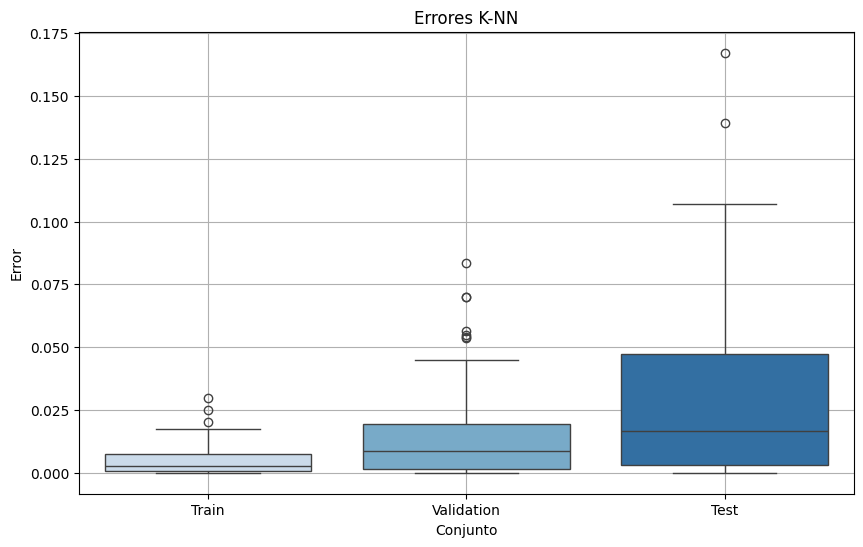

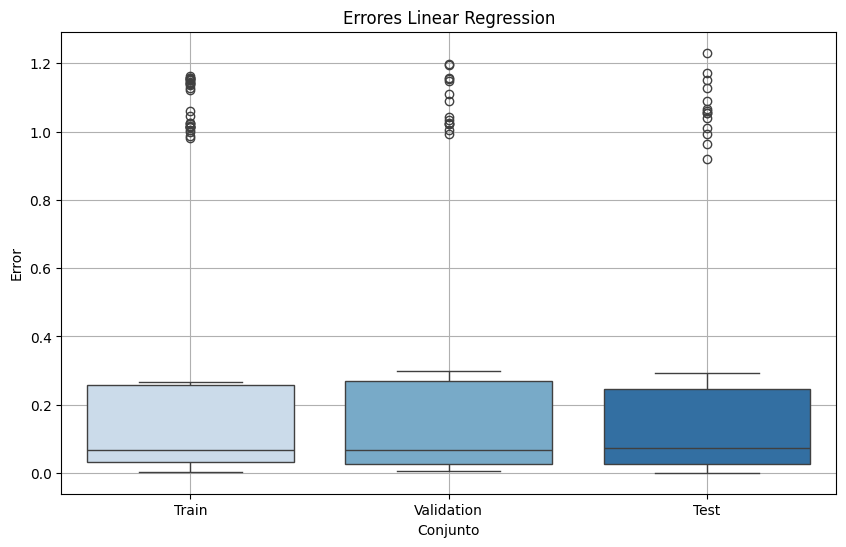

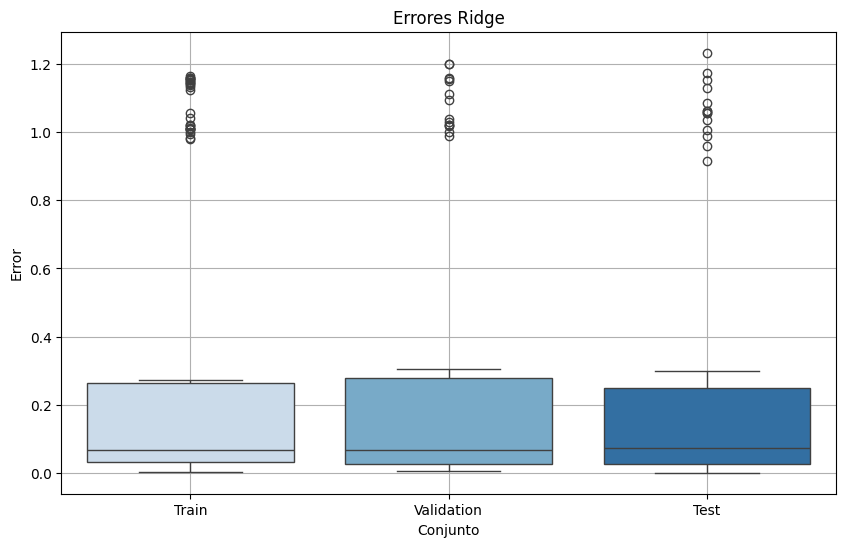

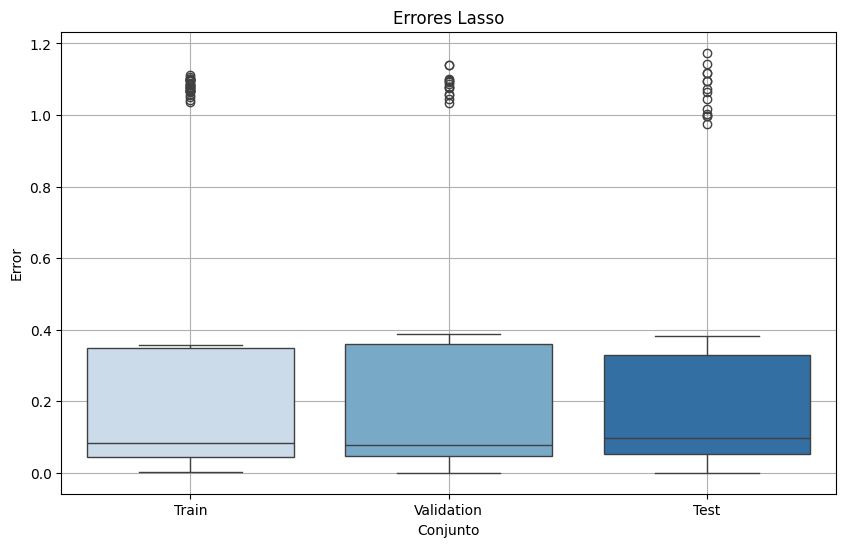

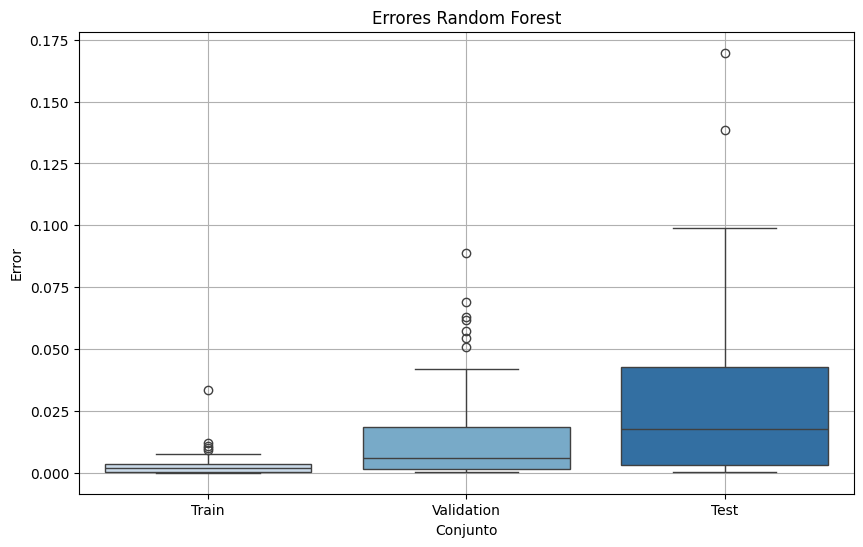

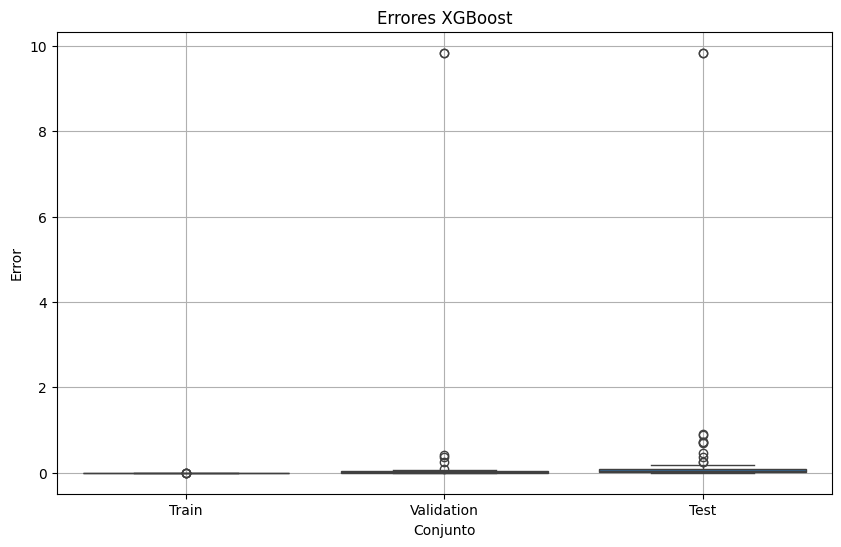

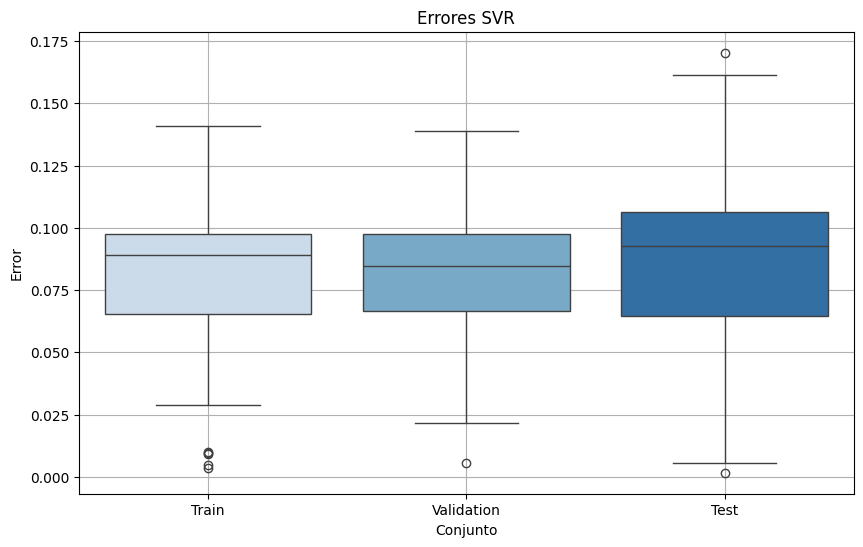

In [28]:
resModelos = []

t = 7

contEje = 1
for ejercicio in sujeto:

    contSen = 1
    for sensor in ejercicio:

        valSensor = sensor.values

        X_train, y_train, X_val, y_val, X_test, y_test = ParticionTrainValTest(valSensor, t)

        for nombre_modelo, modelo in modelos.items():

            modelo.fit(X_train.reshape(-1, t), y_train.flatten())

            y_train_pred = modelo.predict(X_train.reshape(-1, t))
            errores_train = np.abs(np.concatenate(np.concatenate(y_train)) - y_train_pred)

            y_val_pred = modelo.predict(X_val.reshape(-1, t))
            errores_val = np.abs(np.concatenate(np.concatenate(y_val)) - y_val_pred)

            y_test_pred = modelo.predict(X_test.reshape(-1, t))
            errores_test = np.abs(np.concatenate(np.concatenate(y_test)) - y_test_pred)

            errores_df = pd.DataFrame({
                'Errores': np.concatenate([errores_train, errores_val, errores_test]),
                'Conjunto': ['Train'] * len(errores_train) + ['Validation'] * len(errores_val) + ['Test'] * len(errores_test)
            })

            plt.figure(figsize=(10, 6))
            sns.boxplot(x='Conjunto', y='Errores', data=errores_df, palette='Blues')
            plt.title(f'Errores {nombre_modelo}')
            plt.ylabel('Error')

            plt.grid()
            plt.show()




            

            #break # un solo modelo

        contSen += 1
        break # un solo sensor

    contEje += 1
    break #un solo ejercicio

si se observa que la `mediana` por cada caja se acercan entre si

# 7. Predicciones

In [29]:
df_t7 = pd.read_csv('dfResModelos_t7.csv')
df_t7['t'] = 't7'

df_t14 = pd.read_csv('dfResModelos_t14.csv')
df_t14['t'] = 't14'

df_t21 = pd.read_csv('dfResModelos_t21.csv')
df_t21['t'] = 't21'

df_t28 = pd.read_csv('dfResModelos_t28.csv')
df_t28['t'] = 't28'

df = pd.concat([df_t7, df_t14, df_t21, df_t28])

best_models = df.loc[df.groupby('id')['R2 Test'].idxmax()]

best_models[['t', 'id', 'Modelo', 'R2 Test']]

t      id Modelo   R2 Test
0     t7  s3e1u1   K-NN  0.999784
0    t14  s3e1u1   K-NN  0.999382
0    t21  s3e1u1   K-NN  0.090601
0    t28  s3e1u1   K-NN  0.999452
13    t7  s3e1u2    SVR  0.808725
..   ...     ...    ...       ...
272  t28  s3e8u4    SVR  0.994622
273   t7  s3e8u5   K-NN  0.999901
273  t14  s3e8u5   K-NN  0.999857
273  t21  s3e8u5   K-NN -0.138497
273  t28  s3e8u5   K-NN  0.999190

[160 rows x 4 columns]

In [30]:
final_best_window = best_models.loc[best_models.groupby('id')['R2 Test'].idxmax()]
final_best_window = final_best_window.reset_index(drop=True)
final_best_window

id Modelo      MAPE Val  RMSE Val    R2 Val  Ljung-Box Val  \
0    s3e1u1   K-NN     46.700680  0.025479  0.999935       0.673498   
1    s3e1u1   K-NN     46.663318  0.048293  0.999764       0.009275   
2    s3e1u1   K-NN   1433.449977  3.366634 -0.136057       0.126783   
3    s3e1u1   K-NN     79.267930  0.085462  0.999269       0.585389   
4    s3e1u2    SVR    570.050026  0.274425  0.992111       0.007780   
..      ...    ...           ...       ...       ...            ...   
155  s3e8u4    SVR     64.576595  0.148566  0.997617       0.121578   
156  s3e8u5   K-NN     60.143667  0.024803  0.999941       0.954885   
157  s3e8u5   K-NN     44.156141  0.025220  0.999939       0.862908   
158  s3e8u5   K-NN  11527.851820  3.493681 -0.161996       0.219497   
159  s3e8u5   K-NN     86.356632  0.077742  0.999422       0.980961   

     Jarque-Bera Val    MAPE Test  RMSE Test   R2 Test  Ljung-Box Test  \
0       4.625688e-04    44.050521   0.046217  0.999784        0.014523   
1       1.453713e-12    64.887719   0.078499  0.999382        0.454171   
2       1.681192e-17  1131.607094   3.015136  0.090601        0.131753   
3       3.061506e-07   154.990277   0.073578  0.999452        0.025971   
4      2.025493e-152    63.163178   1.621524  0.808725        0.000276   
..               ...          ...        ...       ...             ...   
155     6.633061e-13    67.689497   0.221560  0.994622        0.083619   
156     3.349574e-01    27.874596   0.032146  0.999901        0.072778   
157     1.037635e-03   144.328558   0.038749  0.999857        0.016237   
158     1.524294e-13  1582.502742   3.449678 -0.138497        0.383078   
159     2.144182e-20   142.008388   0.091923  0.999190        0.091311   

     Jarque-Bera Test    t  
0        2.201872e-07   t7  
1        1.039888e-25  t14  
2        2.327461e-19  t21  
3        2.320269e-04  t28  
4        2.332435e-15   t7  
..                ...  ...  
155      1.555671e-01  t28  
156      7.789711e-09   t7  
157      3.245957e-02  t14  
158      3.164783e-14  t21  
159      1.961501e-05  t28  

[160 rows x 13 columns]

In [31]:
average_r2_by_model = final_best_window.groupby(['t', 'Modelo'])['R2 Test'].mean().reset_index()

average_r2_by_model

t             Modelo    R2 Test
0   t14               K-NN   0.584018
1   t14  Linear Regression   0.974409
2   t14      Random Forest   0.990187
3   t14              Ridge   0.987297
4   t14                SVR   0.845685
5   t14            XGBoost   0.999721
6   t21               K-NN  -0.322159
7   t21  Linear Regression -25.182058
8   t21      Random Forest  -0.551535
9   t21              Ridge  -0.026456
10  t21                SVR  -0.164385
11  t21            XGBoost  -0.580907
12  t28               K-NN   0.700441
13  t28  Linear Regression   0.964264
14  t28      Random Forest   0.958950
15  t28              Ridge   0.998416
16  t28                SVR   0.683135
17  t28            XGBoost   0.977951
18   t7               K-NN   0.759520
19   t7  Linear Regression   0.835763
20   t7      Random Forest   0.997787
21   t7              Ridge   0.985060
22   t7                SVR   0.941786
23   t7            XGBoost   0.994284

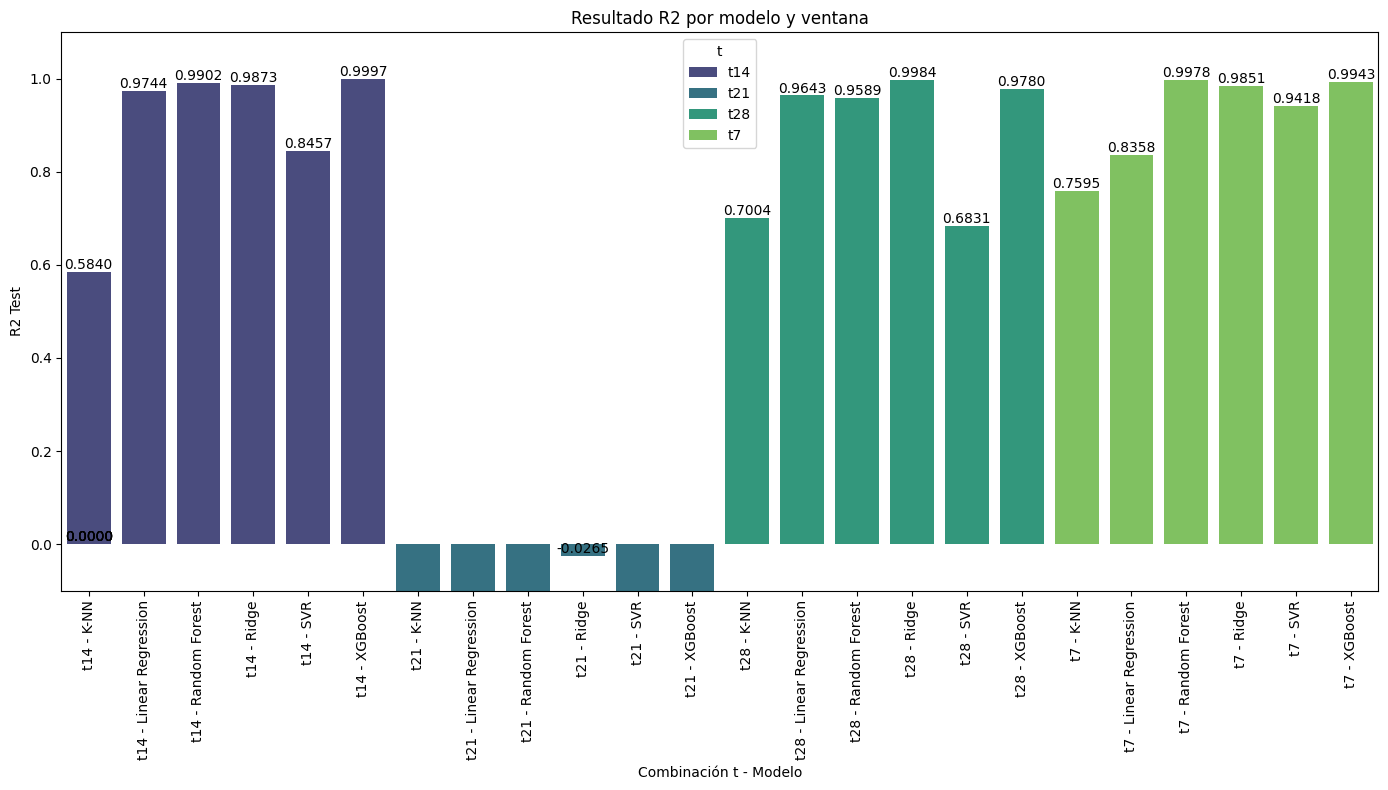

In [32]:
best_combination = final_best_window.groupby(['t', 'Modelo'])['R2 Test'].mean().reset_index()

best_combination['t_Modelo'] = best_combination['t'] + ' - ' + best_combination['Modelo']

plt.figure(figsize=(14, 8))
ax = sns.barplot(x='t_Modelo', y='R2 Test', data=best_combination, palette='viridis', hue='t')

plt.title('Resultado R2 por modelo y ventana')
plt.xlabel('Combinación t - Modelo')
plt.ylabel('R2 Test')
plt.xticks(rotation=90)

plt.ylim(-0.1, 1.1)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.4f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=10, color='black', 
                xytext=(0, 5), textcoords='offset points')
    
plt.tight_layout()
plt.show()

lo primero que llama la atención es que los modelos tienen pesimo desempeño cuando trabaja con una ventana `t:21` y para el resto de los modelos con su tamaño de ventana el que mejor sobresale es con `t:7` que entre el promedio es el mayor con `0,921028` y del resto de ventanas teniendo un promedio entre sus modelos de: `t:14 (0,900249)` , `t:21 (-4,477615)` , `t:14 (0,882914)`